In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:90%;}
div.CodeMirror {font-family:Consolas; font-size:18pt;}
div.output {font-size:19pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:19pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
span.toc-item-num{display:none;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
div.CodeMirror-lines > div {padding-left:10px;}
table.dataframe{font-size:18px;}
</style>
"""))

# 1. 패키지로드 & 한글설정 & 경고메세지 ignore

In [2]:
# 패키지 import
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 시각화의 선명도를 높임
%config InlineBackend.figure_format = "retina"

# 한글설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

# warning(경고) 안보이게
import warnings
warnings.filterwarnings(action='ignore') # 경고 메세지 안 보이게
# warnings.filterwarnings(action='default') # 경고 메세지 보이게

# 2. 데이터 다운받아, 서울과 부산데이터만 df변수에 읽어온다

In [3]:
%ls D:\ai\Downloads\shareData\상가정보

 D 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 2D0E-15FE

 D:\ai\Downloads\shareData\상가정보 디렉터리

2024-11-18  오후 04:19    <DIR>          .
2024-11-18  오후 04:19    <DIR>          ..
2024-10-23  오후 05:59             1,011 [필독]파일열람방법.txt
2024-10-23  오후 06:19        53,454,658 소상공인시장진흥공단_상가(상권)정보_강원_202409.csv
2024-10-23  오후 06:19       301,935,950 소상공인시장진흥공단_상가(상권)정보_경기_202409.csv
2024-10-23  오후 06:20        86,291,699 소상공인시장진흥공단_상가(상권)정보_경남_202409.csv
2024-10-23  오후 06:20        70,952,897 소상공인시장진흥공단_상가(상권)정보_경북_202409.csv
2024-10-23  오후 06:20        36,458,714 소상공인시장진흥공단_상가(상권)정보_광주_202409.csv
2024-10-23  오후 06:20        57,391,847 소상공인시장진흥공단_상가(상권)정보_대구_202409.csv
2024-10-23  오후 06:20        36,638,904 소상공인시장진흥공단_상가(상권)정보_대전_202409.csv
2024-10-23  오후 06:20        78,253,942 소상공인시장진흥공단_상가(상권)정보_부산_202409.csv
2024-10-23  오후 06:18       254,255,270 소상공인시장진흥공단_상가(상권)정보_서울_202409.csv
2024-10-23  오후 06:18         8,277,492 소상공인시장진흥공단_상가(상권)정보_세종_202409.csv
2024-10-23  오후 06:18        26,299,042 소상공인시장진흥공단

In [3]:
# 서울 소상공인 데이터
df_seoul = pd.read_csv('D:/ai/Downloads/shareData/상가정보/소상공인시장진흥공단_상가(상권)정보_서울_202409.csv',
                      low_memory=False,
                      #encoding='UTF8'
                      )
# low_memory=False : 대용량 데이터를 불어오는 경우 
df_seoul.shape

(466022, 39)

In [6]:
df_seoul.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA0101202210A0093845,이상한스냅,NaN,M1,과학·기술,M113,사진 촬영,M11301,사진촬영업,M73303,...,1147010300100090004000001,백송주택,서울특별시 양천구 월정로 283,158822,7902,NaN,NaN,NaN,126.828832,37.542117


In [7]:
pd.options.display.max_columns

20

In [9]:
pd.options.display.max_columns = 39
df_seoul.head(2)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA0101202210A0093845,이상한스냅,NaN,M1,과학·기술,M113,사진 촬영,M11301,사진촬영업,M73303,사진 처리업,11,서울특별시,11470,양천구,11470600,신월5동,1147010300,신월동,1147010300100090004,1,대지,9,4.0,서울특별시 양천구 신월동 9-4,1.147030e+11,서울특별시 양천구 월정로,283.0,NaN,1147010300100090004000001,백송주택,서울특별시 양천구 월정로 283,158822,7902,NaN,NaN,NaN,126.828832,37.542117
1,MA010120220805430767,토끼정,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,한식 일반 음식점업,11,서울특별시,11500,강서구,11500603,가양1동,1150010500,마곡동,1150010500107740012,1,대지,774,12.0,서울특별시 강서구 마곡동 774-12,1.150032e+11,서울특별시 강서구 마곡동로,55.0,NaN,1150010500107740012000001,마커스빌딩,서울특별시 강서구 마곡동로 55,157805,7802,NaN,2,NaN,126.833022,37.560053


In [4]:
# 부산 소상공인 데이터
df_pusan = pd.read_csv(r'D:\ai\Downloads\shareData\상가정보\소상공인시장진흥공단_상가(상권)정보_부산_202409.csv',
                      #encoding='UTF-8'
                      ) 
df_pusan.shape

(143964, 39)

In [11]:
df_pusan.head(2)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220805430814,리스트,NaN,G2,소매,G209,섬유·의복·신발 소매,G20902,여성 의류 소매업,G47412,여자용 겉옷 소매업,26,부산광역시,26440,강서구,26440535,명지1동,2644010400,명지동,2644010400134380000,1,대지,3438.0,NaN,부산광역시 강서구 명지동 3438,2.644034e+11,부산광역시 강서구 명지국제6로,168.0,NaN,2644010400134380000000001,스타필드시티명지점,부산광역시 강서구 명지국제6로 168,618200,46772,NaN,2,NaN,128.918174,35.093125
1,MA010120220805430900,눈썹그리기교실동안눈썹,NaN,S2,수리·개인,S207,이용·미용,S20702,피부 관리실,S96113,피부 미용업,26,부산광역시,26320,북구,26320543,화명3동,2632010200,화명동,2632010200122720005,1,대지,2272.0,5.0,부산광역시 북구 화명동 2272-5,2.632021e+11,부산광역시 북구 화명대로,31.0,NaN,2632010200122720005015331,현호타워,부산광역시 북구 화명대로 31,616852,46525,NaN,NaN,NaN,129.011641,35.235217


In [12]:
print(df_seoul.columns)
print(df_pusan.columns)

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')
Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')


In [13]:
df_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466022 entries, 0 to 466021
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     466022 non-null  object 
 1   상호명        466022 non-null  object 
 2   지점명        11406 non-null   object 
 3   상권업종대분류코드  466022 non-null  object 
 4   상권업종대분류명   466022 non-null  object 
 5   상권업종중분류코드  466022 non-null  object 
 6   상권업종중분류명   466022 non-null  object 
 7   상권업종소분류코드  466022 non-null  object 
 8   상권업종소분류명   466022 non-null  object 
 9   표준산업분류코드   465931 non-null  object 
 10  표준산업분류명    465931 non-null  object 
 11  시도코드       466022 non-null  int64  
 12  시도명        466022 non-null  object 
 13  시군구코드      466022 non-null  int64  
 14  시군구명       466022 non-null  object 
 15  행정동코드      466022 non-null  int64  
 16  행정동명       466022 non-null  object 
 17  법정동코드      466022 non-null  int64  
 18  법정동명       466022 non-null  object 
 19  지번코드       466022 non-n

In [14]:
df_seoul.dtypes

상가업소번호        object
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드           int64
시도명           object
시군구코드          int64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드          int64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드        float64
도로명           object
건물본번지        float64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호          int64
신우편번호          int64
동정보          float64
층정보           object
호정보          float64
경도           float64
위도           float64
dtype: object

In [15]:
df_pusan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143964 entries, 0 to 143963
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     143964 non-null  object 
 1   상호명        143963 non-null  object 
 2   지점명        3666 non-null    object 
 3   상권업종대분류코드  143964 non-null  object 
 4   상권업종대분류명   143964 non-null  object 
 5   상권업종중분류코드  143964 non-null  object 
 6   상권업종중분류명   143964 non-null  object 
 7   상권업종소분류코드  143964 non-null  object 
 8   상권업종소분류명   143964 non-null  object 
 9   표준산업분류코드   143930 non-null  object 
 10  표준산업분류명    143930 non-null  object 
 11  시도코드       143964 non-null  int64  
 12  시도명        143964 non-null  object 
 13  시군구코드      143964 non-null  int64  
 14  시군구명       143964 non-null  object 
 15  행정동코드      143964 non-null  int64  
 16  행정동명       143964 non-null  object 
 17  법정동코드      143964 non-null  int64  
 18  법정동명       143964 non-null  object 
 19  지번코드       143964 non-n

In [16]:
df_pusan.dtypes

상가업소번호        object
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드           int64
시도명           object
시군구코드          int64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드          int64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지        float64
지번부번지        float64
지번주소          object
도로명코드        float64
도로명           object
건물본번지        float64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호          int64
신우편번호          int64
동정보          float64
층정보           object
호정보          float64
경도           float64
위도           float64
dtype: object

In [21]:
# 부산데이터와 서울데이터 컬럼명들 확인
np.all(df_seoul.columns == df_pusan.columns)

True

In [22]:
# 부산데이터와 서울데이터의 타입들 확인
np.all(df_seoul.dtypes == df_pusan.dtypes)

False

In [23]:
df_seoul.dtypes == df_pusan.dtypes

상가업소번호        True
상호명           True
지점명           True
상권업종대분류코드     True
상권업종대분류명      True
상권업종중분류코드     True
상권업종중분류명      True
상권업종소분류코드     True
상권업종소분류명      True
표준산업분류코드      True
표준산업분류명       True
시도코드          True
시도명           True
시군구코드         True
시군구명          True
행정동코드         True
행정동명          True
법정동코드         True
법정동명          True
지번코드          True
대지구분코드        True
대지구분명         True
지번본번지        False
지번부번지         True
지번주소          True
도로명코드         True
도로명           True
건물본번지         True
건물부번지         True
건물관리번호        True
건물명           True
도로명주소         True
구우편번호         True
신우편번호         True
동정보           True
층정보           True
호정보           True
경도            True
위도            True
dtype: bool

In [25]:
df_seoul['지번본번지'].head()

0      9
1    774
2    143
3    100
4    684
Name: 지번본번지, dtype: int64

In [26]:
df_pusan['지번본번지'].head()

0    3438.0
1    2272.0
2      30.0
3     398.0
4     867.0
Name: 지번본번지, dtype: float64

In [6]:
df = pd.concat([df_seoul, df_pusan])
df.shape

(609986, 39)

In [30]:
df.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            143954, 143955, 143956, 143957, 143958, 143959, 143960, 143961,
            143962, 143963],
           dtype='int64', length=609986)

In [31]:
df_seoul.index

RangeIndex(start=0, stop=466022, step=1)

In [32]:
df_pusan.index

RangeIndex(start=0, stop=143964, step=1)

In [38]:
df.loc[[0],['상호명','시도명','위도','경도']]

,상호명,시도명,위도,경도
0,이상한스냅,서울특별시,37.542117,126.828832
0,리스트,부산광역시,35.093125,128.918174


In [7]:
# concat 후 인덱스 정리
# df.index = range(df.shape[0])
df.reset_index(drop=True, inplace=True)
df.index

RangeIndex(start=0, stop=609986, step=1)

In [43]:
# 현재 주피터 노트북이 쓰고 있는 메모리 용량

In [44]:
%load_ext memory_profiler
%memit

peak memory: 1174.81 MiB, increment: 0.09 MiB


In [8]:
del df_seoul, df_pusan

In [46]:
%load_ext memory_profiler
%memit

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 1174.82 MiB, increment: 0.00 MiB


# 3. df 데이터 셋의 결측치 및 시각화
## ① df 변수의 컬럼들을 확인하고 상위 3줄, 하위3줄을 출력한다.

In [51]:
# df 상위 3줄
df.head(3)
df.iloc[:3]
df.loc[[0,1,2]]# df.loc[0:2]
df[0:3]

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA0101202210A0093845,이상한스냅,NaN,M1,과학·기술,M113,사진 촬영,M11301,사진촬영업,M73303,사진 처리업,11,서울특별시,11470,양천구,11470600,신월5동,1147010300,신월동,1147010300100090004,1,대지,9.0,4.0,서울특별시 양천구 신월동 9-4,1.147030e+11,서울특별시 양천구 월정로,283.0,NaN,1147010300100090004000001,백송주택,서울특별시 양천구 월정로 283,158822,7902,NaN,NaN,NaN,126.828832,37.542117
1,MA010120220805430767,토끼정,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,한식 일반 음식점업,11,서울특별시,11500,강서구,11500603,가양1동,1150010500,마곡동,1150010500107740012,1,대지,774.0,12.0,서울특별시 강서구 마곡동 774-12,1.150032e+11,서울특별시 강서구 마곡동로,55.0,NaN,1150010500107740012000001,마커스빌딩,서울특별시 강서구 마곡동로 55,157805,7802,NaN,2,NaN,126.833022,37.560053
2,MA010120220805430797,가배차,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,한식 일반 음식점업,11,서울특별시,11710,송파구,11710580,송파1동,1171010400,송파동,1171010400101430002,1,대지,143.0,2.0,서울특별시 송파구 송파동 143-2,1.171031e+11,서울특별시 송파구 가락로,209.0,NaN,1171010400101430002012823,사이언스빌딩,서울특별시 송파구 가락로 209,138852,5663,NaN,1,NaN,127.116136,37.507170


In [55]:
# 하위 3줄
df.tail(3)
df.iloc[-3:]
df[-3:]

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
609983,MA0101202406A0471221,웰컴투뮤즈월드,NaN,P1,교육,P107,교육 지원,P10701,교육컨설팅업,P85701,교육관련 자문 및 평가업,26,부산광역시,26230,부산진구,26230520,부전2동,2623010300,부전동,2623010300102260001,1,대지,226.0,1.0,부산광역시 부산진구 부전동 226-1,2.623042e+11,부산광역시 부산진구 중앙대로680번길,22.0,NaN,2623010300102260001005883,NaN,부산광역시 부산진구 중앙대로680번길 22,614846,47296,NaN,NaN,NaN,129.060463,35.153214
609984,MA0101202406A0497602,슈아브,NaN,I2,음식,I212,비알코올,I21201,카페,I56221,커피 전문점,26,부산광역시,26140,서구,26140630,초장동,2614011900,초장동,2614011900100540003,1,대지,54.0,3.0,부산광역시 서구 초장동 54-3,2.614030e+11,부산광역시 서구 구덕로,147.0,NaN,2614011900100540003000245,NaN,부산광역시 서구 구덕로 147,602834,49245,NaN,2,NaN,129.020472,35.097986
609985,MA0101202406A0470616,공동법률사무소문정,NaN,M1,과학·기술,M103,법무관련,M10301,변호사,M71101,변호사업,26,부산광역시,26470,연제구,26470610,거제1동,2647010100,거제동,2647010100114920003,1,대지,1492.0,3.0,부산광역시 연제구 거제동 1492-3,2.647042e+11,부산광역시 연제구 법원남로15번길,12.0,NaN,2647010100114920003019273,대한타워빌딩,부산광역시 연제구 법원남로15번길 12,611730,47511,NaN,7,NaN,129.073684,35.190460


## ②	df 변수의 결측치를 제외한 데이터 개수 및 dtype들을 출력(dtypes함수)하고 변수가 사용되는 메모리 사용량 확인한다.

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609986 entries, 0 to 609985
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     609986 non-null  object 
 1   상호명        609985 non-null  object 
 2   지점명        15072 non-null   object 
 3   상권업종대분류코드  609986 non-null  object 
 4   상권업종대분류명   609986 non-null  object 
 5   상권업종중분류코드  609986 non-null  object 
 6   상권업종중분류명   609986 non-null  object 
 7   상권업종소분류코드  609986 non-null  object 
 8   상권업종소분류명   609986 non-null  object 
 9   표준산업분류코드   609861 non-null  object 
 10  표준산업분류명    609861 non-null  object 
 11  시도코드       609986 non-null  int64  
 12  시도명        609986 non-null  object 
 13  시군구코드      609986 non-null  int64  
 14  시군구명       609986 non-null  object 
 15  행정동코드      609986 non-null  int64  
 16  행정동명       609986 non-null  object 
 17  법정동코드      609986 non-null  int64  
 18  법정동명       609986 non-null  object 
 19  지번코드       609986 non-n

## ③	결측치를 확인하고 결측치가 없는 컬럼을 포함하여 시각화(정렬전 bar plot, barh plot, 정렬 후 bar plot, barh plot)

In [59]:
# 열별 결측치 갯수 확인
missing_cnt = df.isna().sum()
missing_cnt

상가업소번호            0
상호명               1
지점명          594914
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드        125
표준산업분류명         125
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             4
지번부번지         92754
지번주소              0
도로명코드            47
도로명               0
건물본번지            48
건물부번지        525475
건물관리번호           35
건물명          339686
도로명주소             0
구우편번호             0
신우편번호             0
동정보          609986
층정보          211021
호정보          609986
경도                0
위도                0
dtype: int64

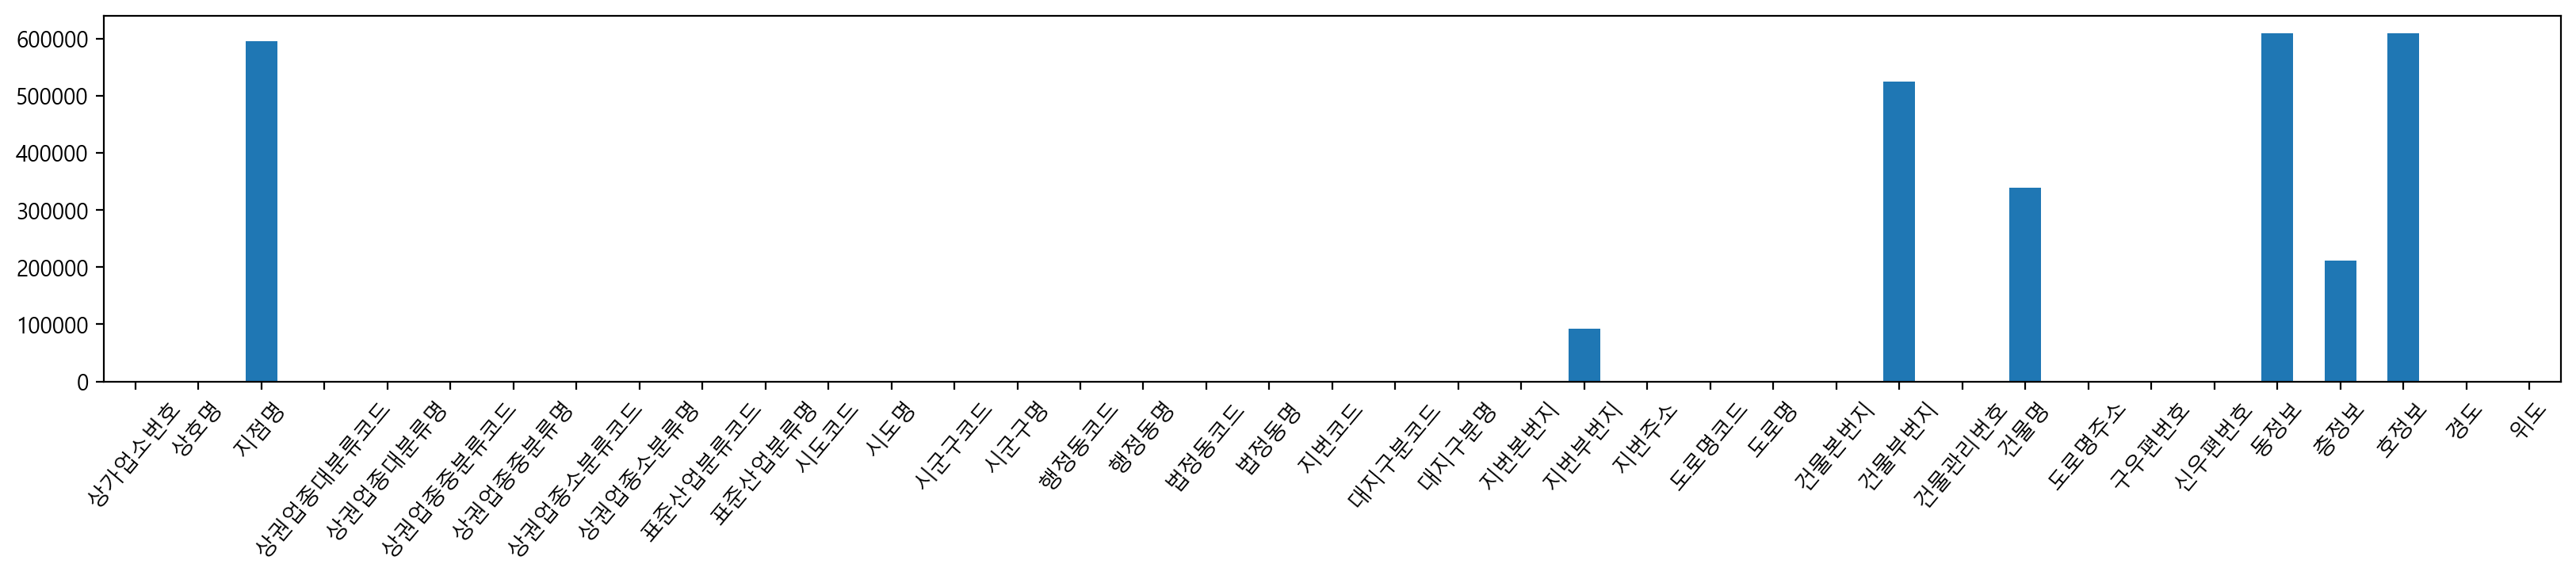

In [65]:
# 결측치를 세로막대그래프(bar)로 시각화
# missing_cnt.plot(kind='bar')
missing_cnt.plot.bar(rot=50, figsize=(20,3))
plt.show()

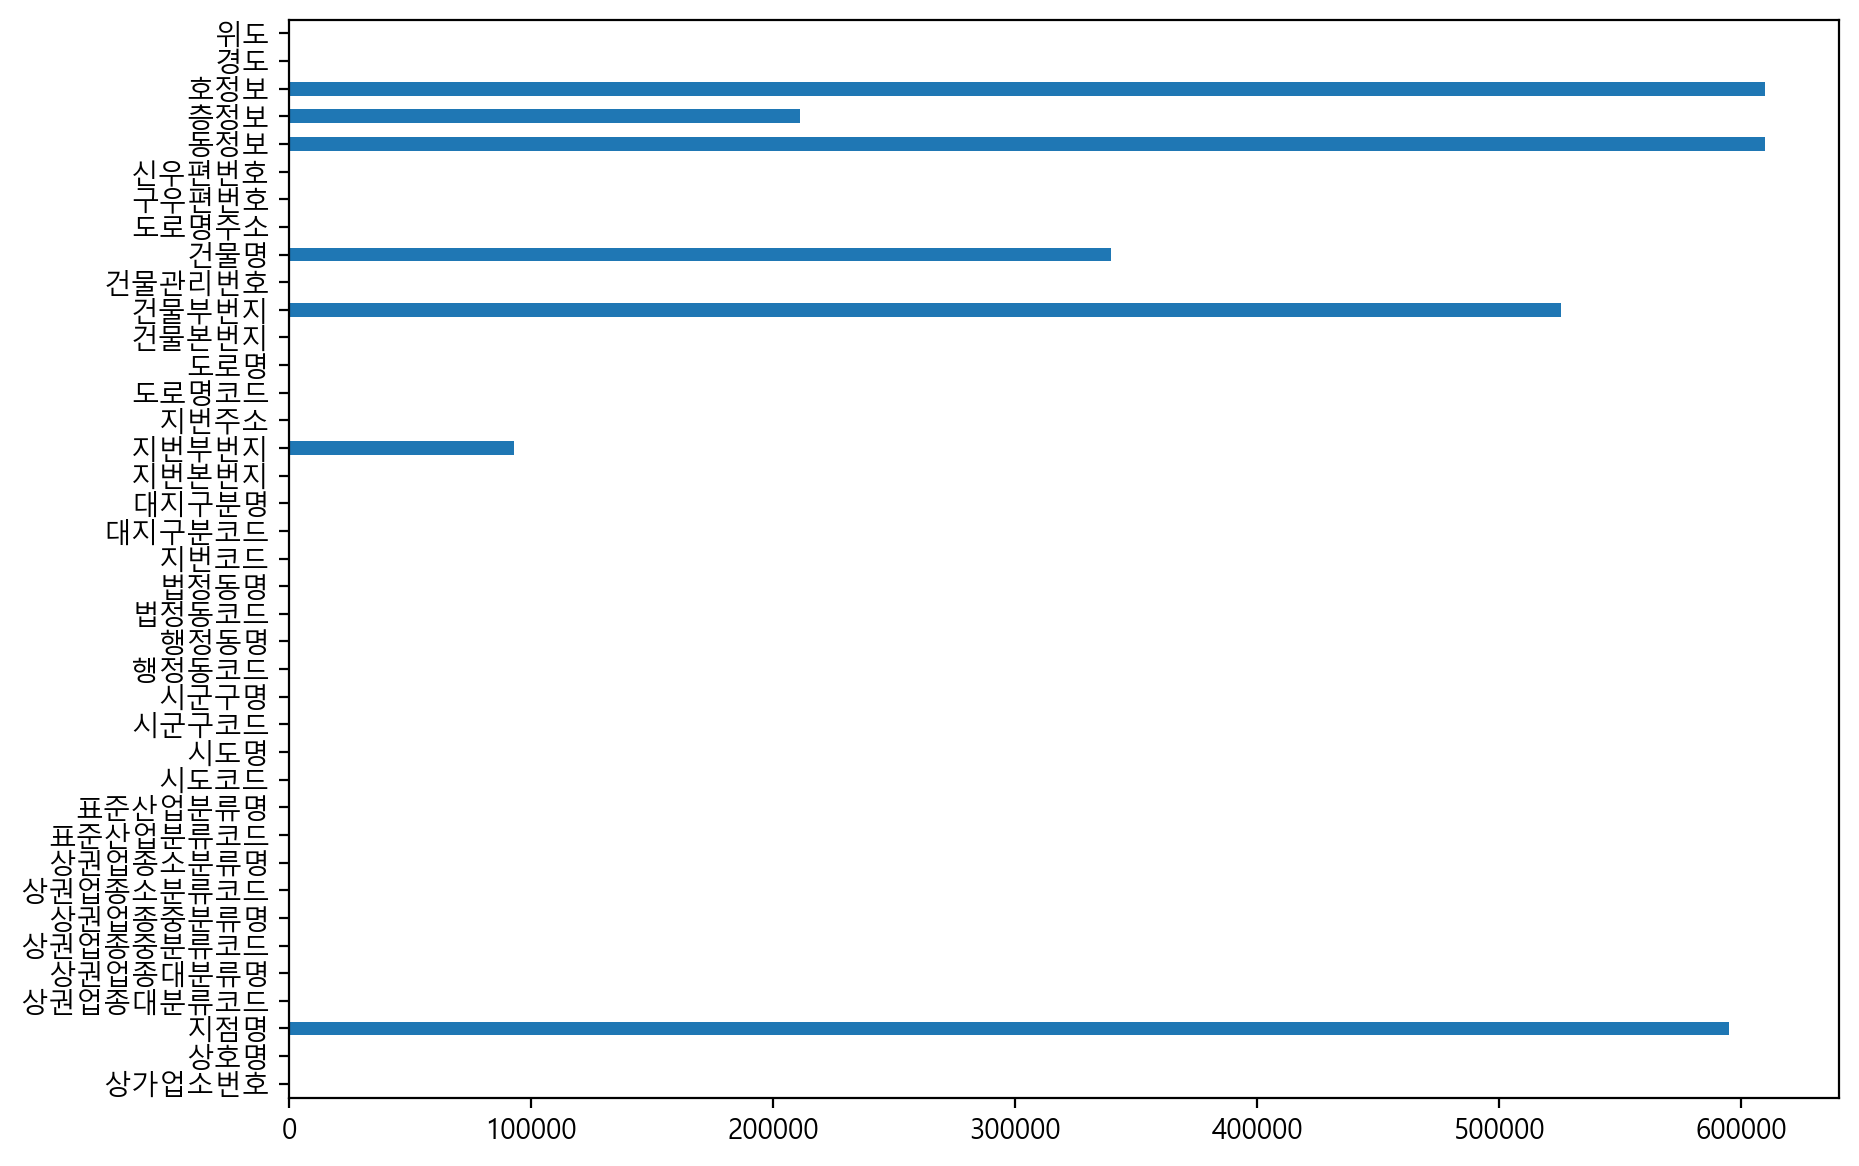

In [70]:
# 결측치를 가로막대그래프(barh)로 시각화
# missing_cnt.plot(kind='barh')
missing_cnt.plot.barh(figsize=(10,7))
plt.show()

In [79]:
missing_cnt_sorted = missing_cnt.sort_values(ascending=False)

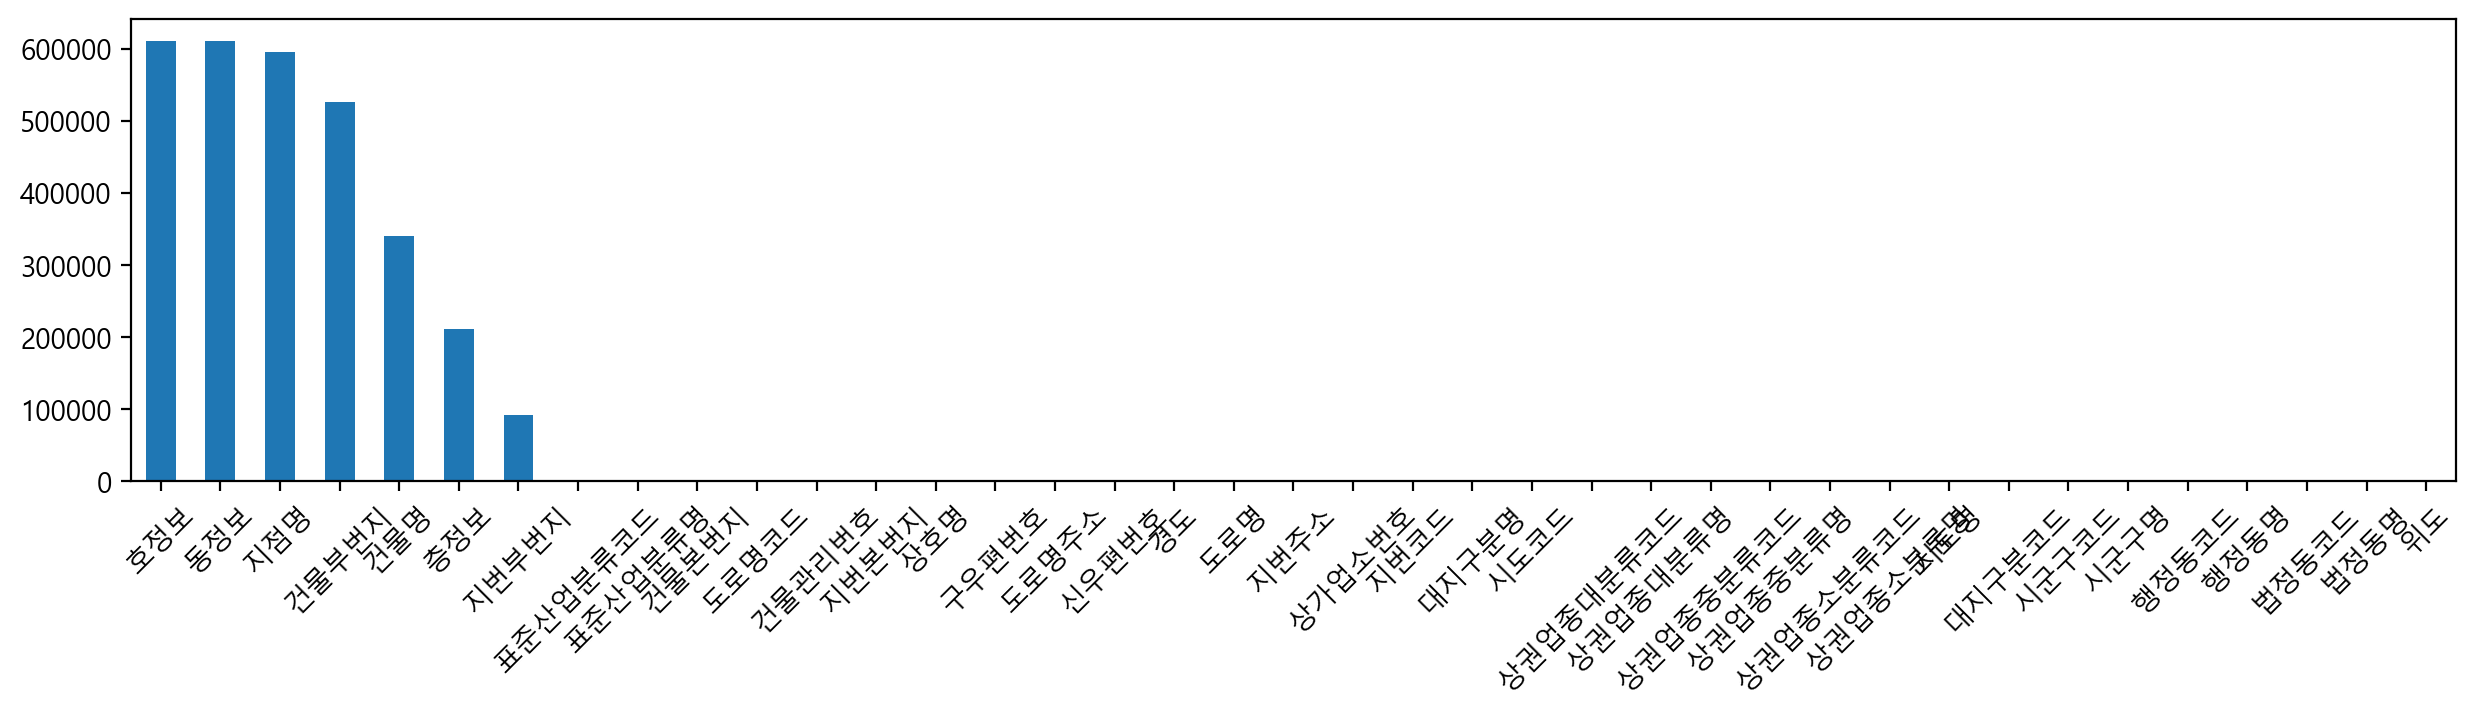

In [76]:
missing_cnt_sorted.plot(kind='bar', rot=45, figsize=(15,3))
plt.show()

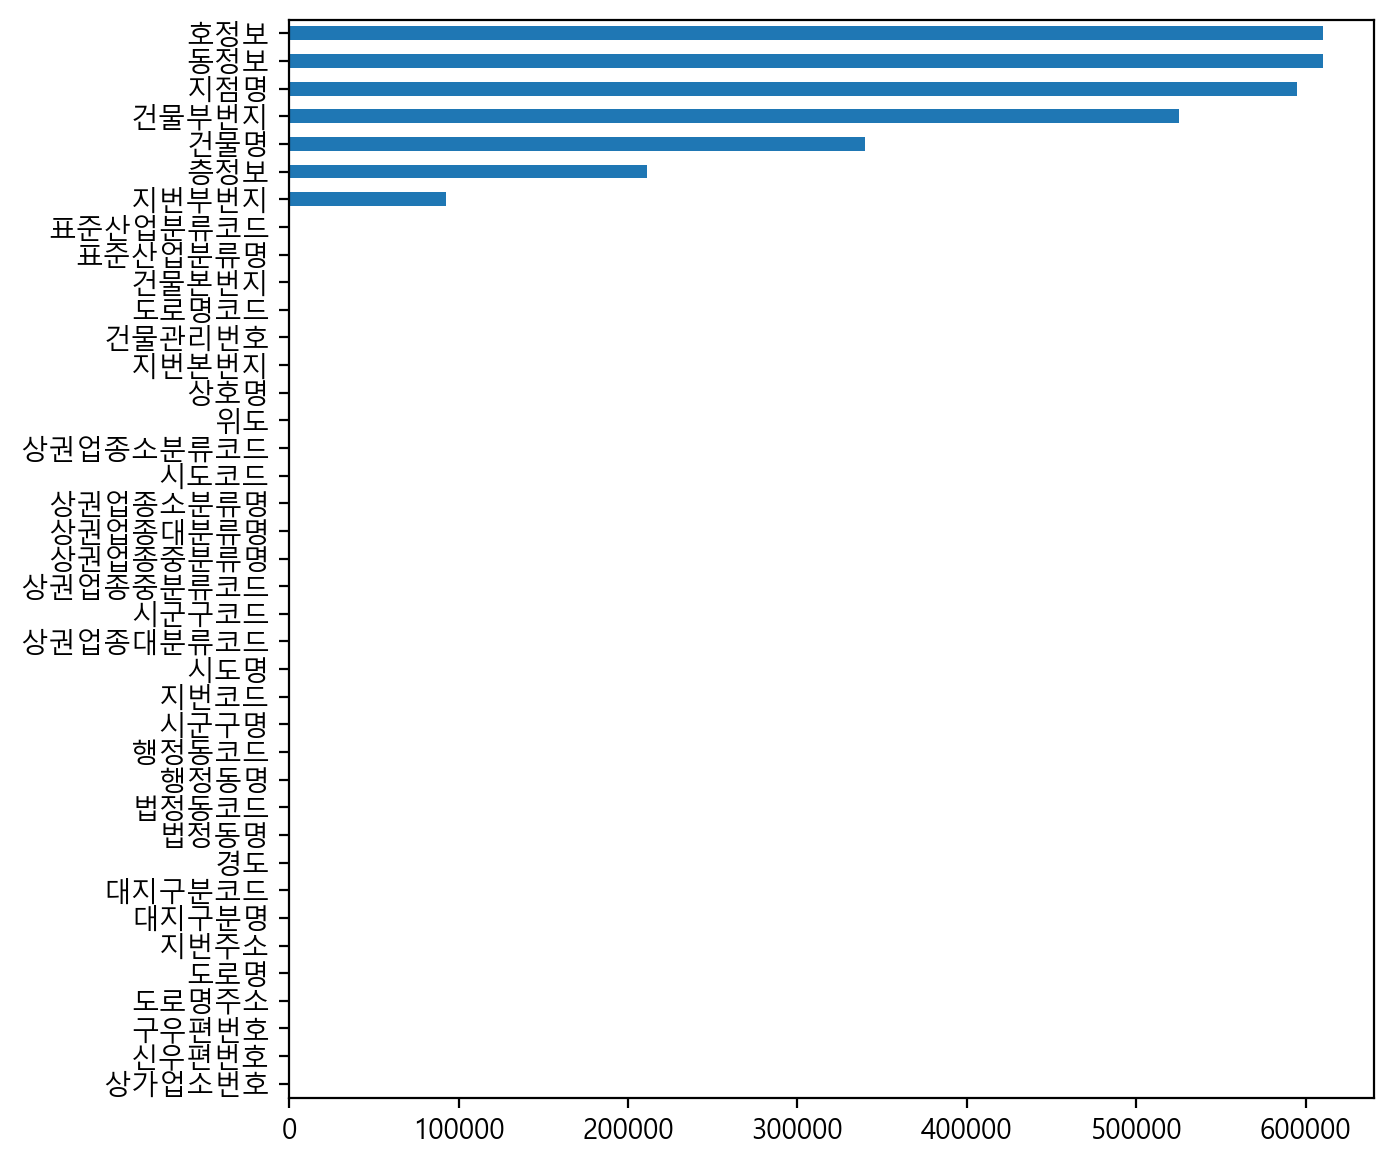

In [81]:
missing_cnt.sort_values().plot(kind='barh', figsize=(7,7))
plt.show()

## ④ 결측치가 없는 컬럼는 제외하고 시각화(정렬전 bar plot, barh plot, 정렬 후 bar plot, barh plot).

In [85]:
# missing_cnt : 열별 결측치 갯수
only_missing_cnt = missing_cnt[missing_cnt!=0]
only_missing_cnt

상호명              1
지점명         594914
표준산업분류코드       125
표준산업분류명        125
지번본번지            4
지번부번지        92754
도로명코드           47
건물본번지           48
건물부번지       525475
건물관리번호          35
건물명         339686
동정보         609986
층정보         211021
호정보         609986
dtype: int64

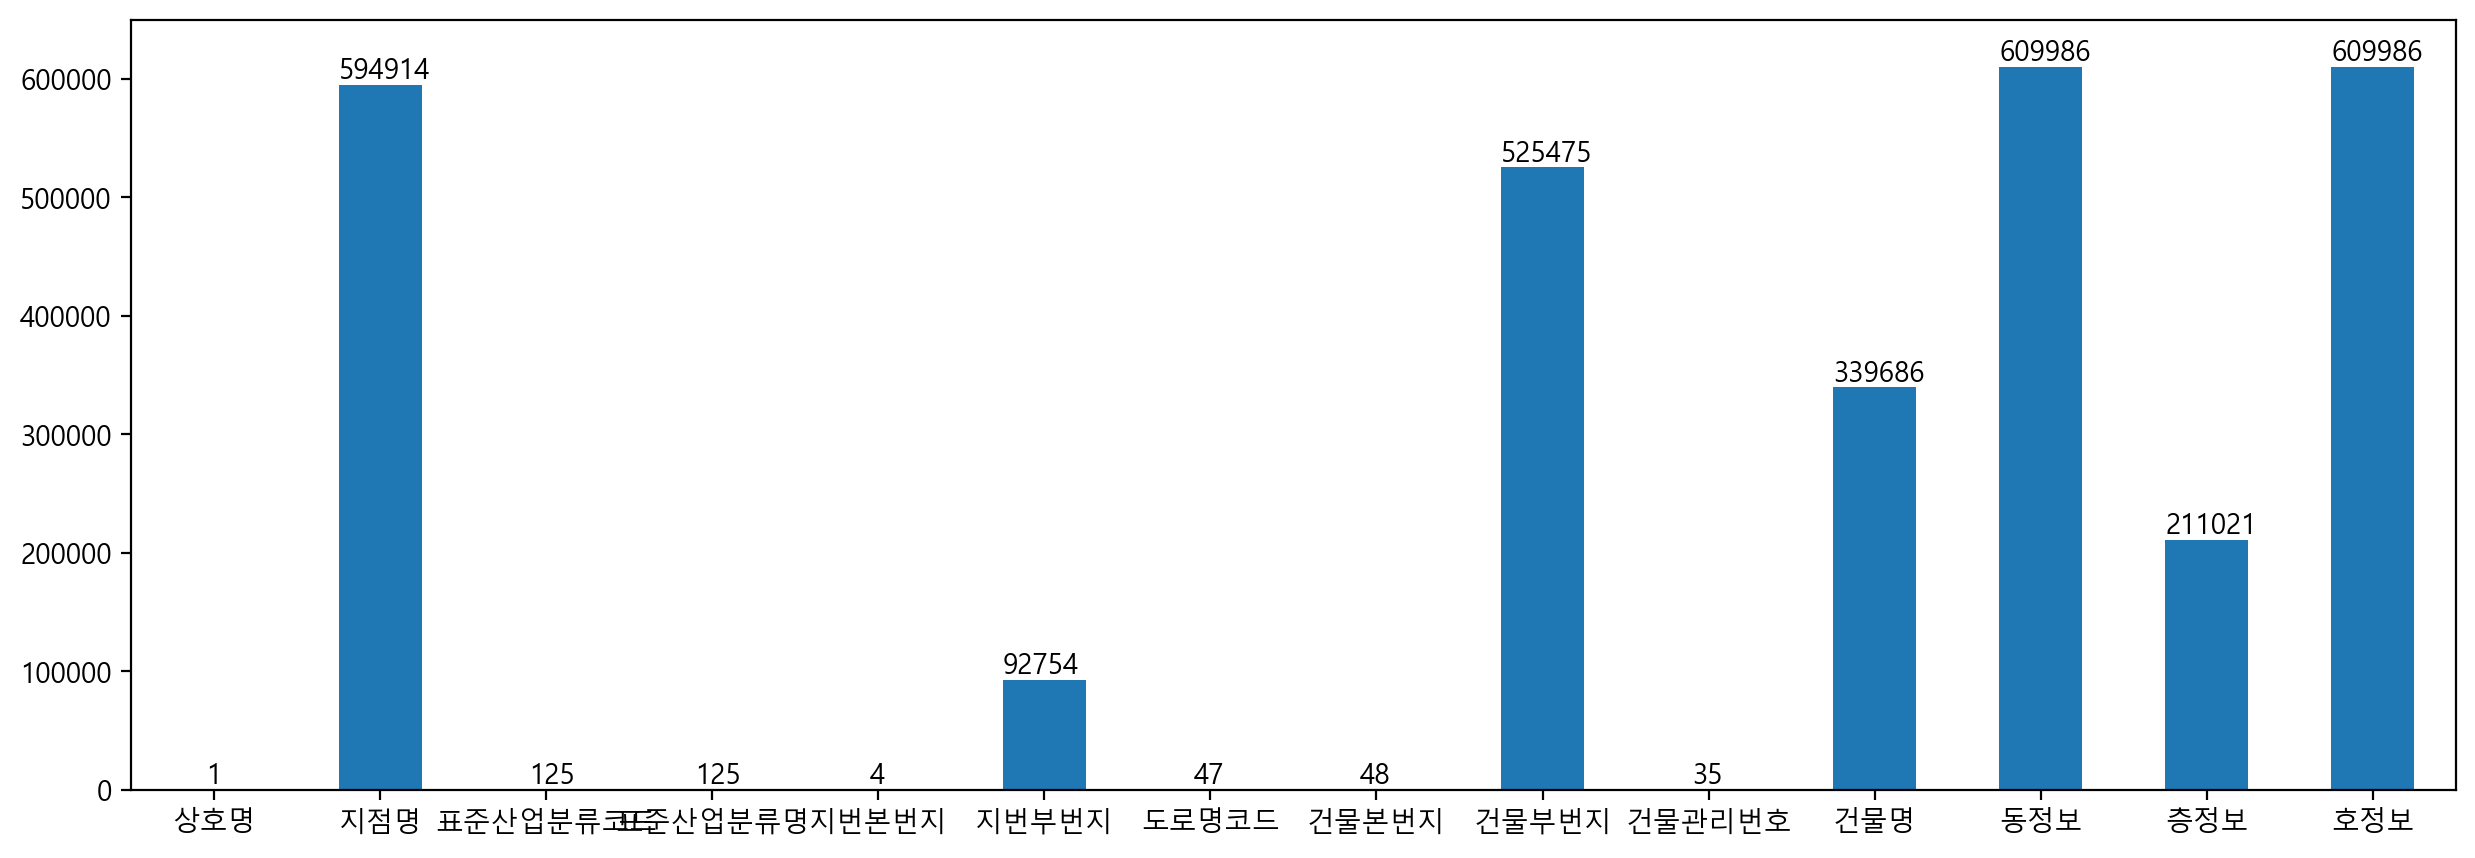

In [113]:
# only_missing_cnt(결측치가 있는 열 갯수)를 barplot
only_missing_cnt.plot.bar(figsize=(15,5), 
                          rot=0,
                          ylim = [0,650000])
for i, v in enumerate(only_missing_cnt):
    if v<10:
        plt.text(i-0.05, v+5000, v)
    elif v<1000 :
        plt.text(i-0.1, v+5000, v)
    else:
        plt.text(i-0.25, v+5000, v)
plt.show()

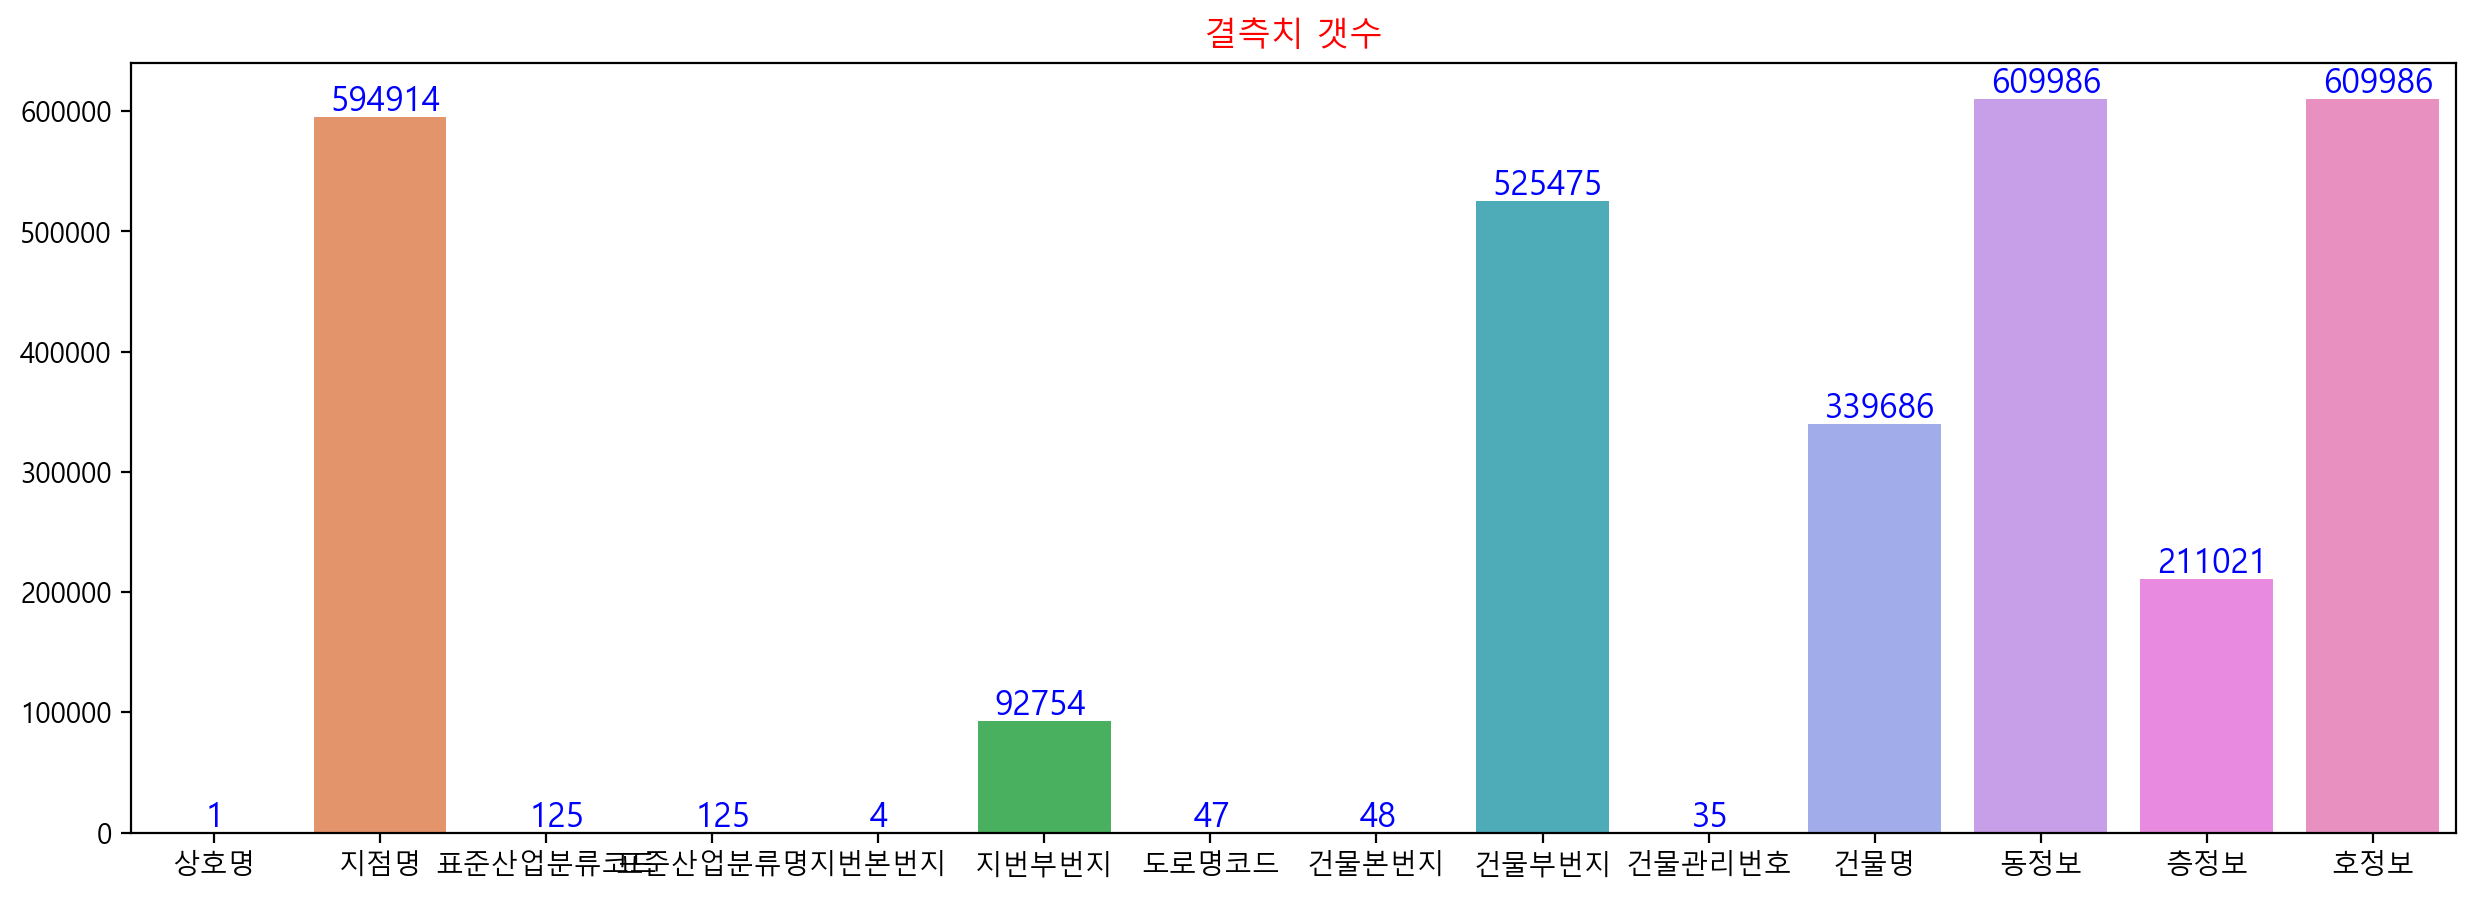

In [127]:
# only_missing_cnt(결측치가 있는 열 갯수)를 barplot
plt.figure(figsize=(15,5))
g = sns.barplot(data=only_missing_cnt.to_frame(),
           x=only_missing_cnt.index,
           y=only_missing_cnt)
for i, v in enumerate(only_missing_cnt):
    if v<10:
        plt.text(i-0.05, v+5000, v, color='b', fontsize=12)
    elif v<1000 :
        plt.text(i-0.1, v+5000, v, color='b', fontsize=12)
    else:
        plt.text(i-0.3, v+5000, v, color='b', fontsize=12)
# plt.title('결측치 갯수')
# g.set(title='결측치 갯수')
g.set_title('결측치 갯수', color='r')
plt.show()

In [131]:
only_missing_cnt_sorted = only_missing_cnt.sort_values(ascending=False)
only_missing_cnt_sorted

동정보         609986
호정보         609986
지점명         594914
건물부번지       525475
건물명         339686
층정보         211021
지번부번지        92754
표준산업분류코드       125
표준산업분류명        125
건물본번지           48
도로명코드           47
건물관리번호          35
지번본번지            4
상호명              1
dtype: int64

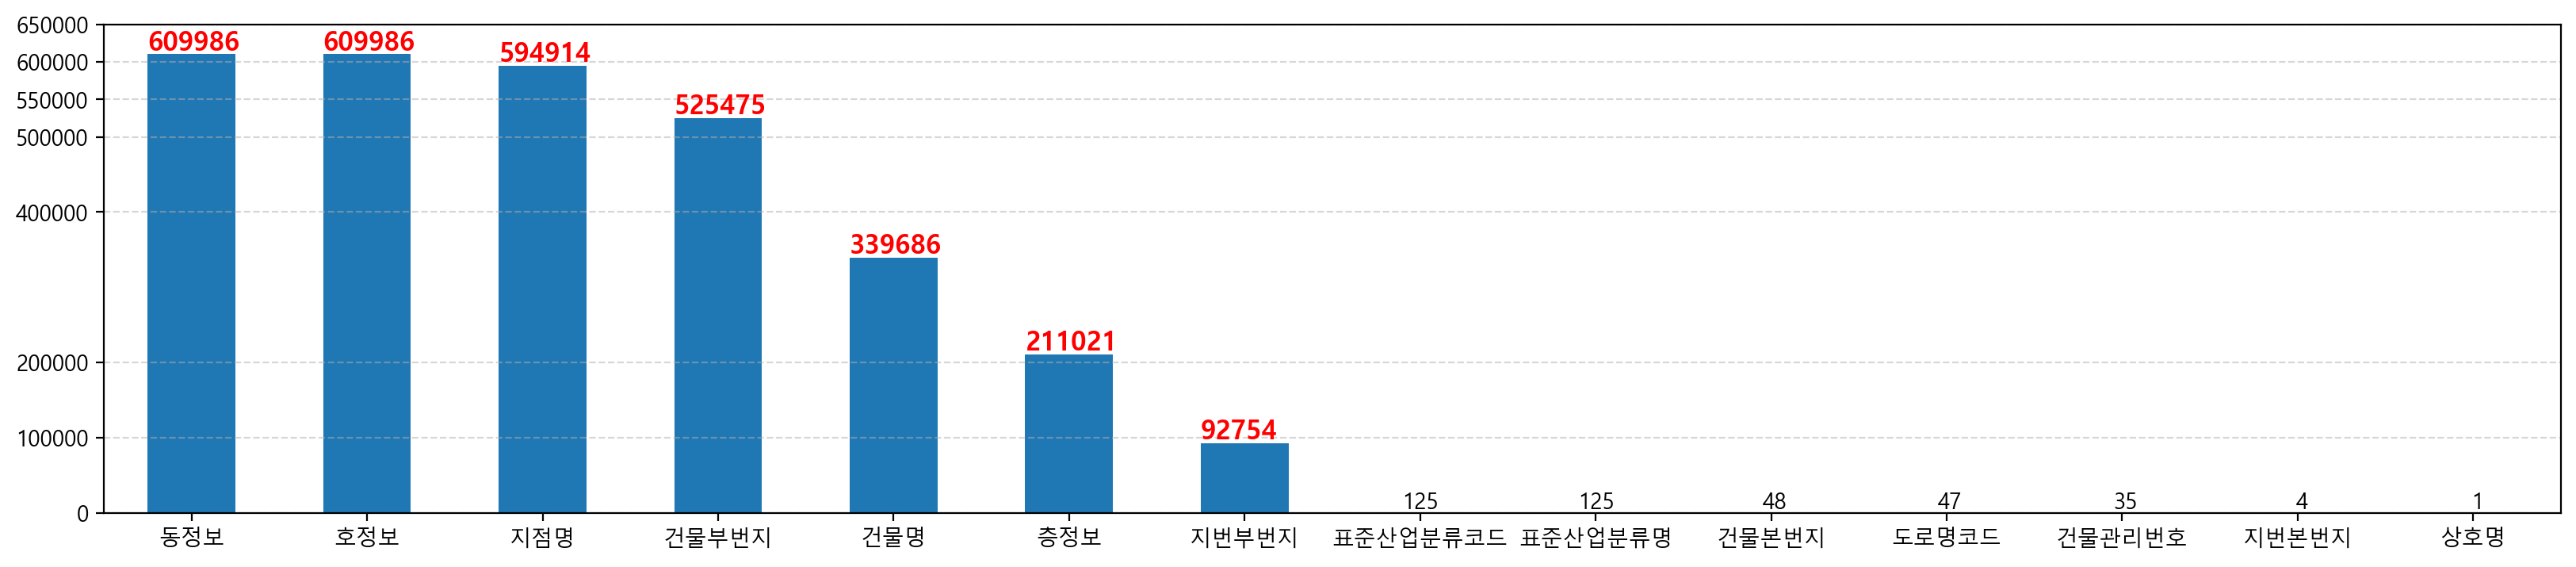

In [152]:
only_missing_cnt_sorted.plot.bar(ylim=[0,650000],
                                yticks=[0, 100000, 200000, 400000, 500000, 550000, 600000, 650000],
                                figsize=(20,4),
                                rot=0)
plt.grid(axis='y', linestyle='--', alpha=0.5) # y축만 점선 0.5만큼 투명한 점선 grid 추가
for i, v in enumerate(only_missing_cnt_sorted):
    if v<10:
        plt.text(i-0.01, v+5000, v)
    elif v<100:
        plt.text(i-0.05, v+5000, v)
    elif v<1000:
        plt.text(i-0.1, v+5000, v)
    else:
        plt.text(i-0.25, v+5000, v, color='r', fontweight='bold', fontsize=12)

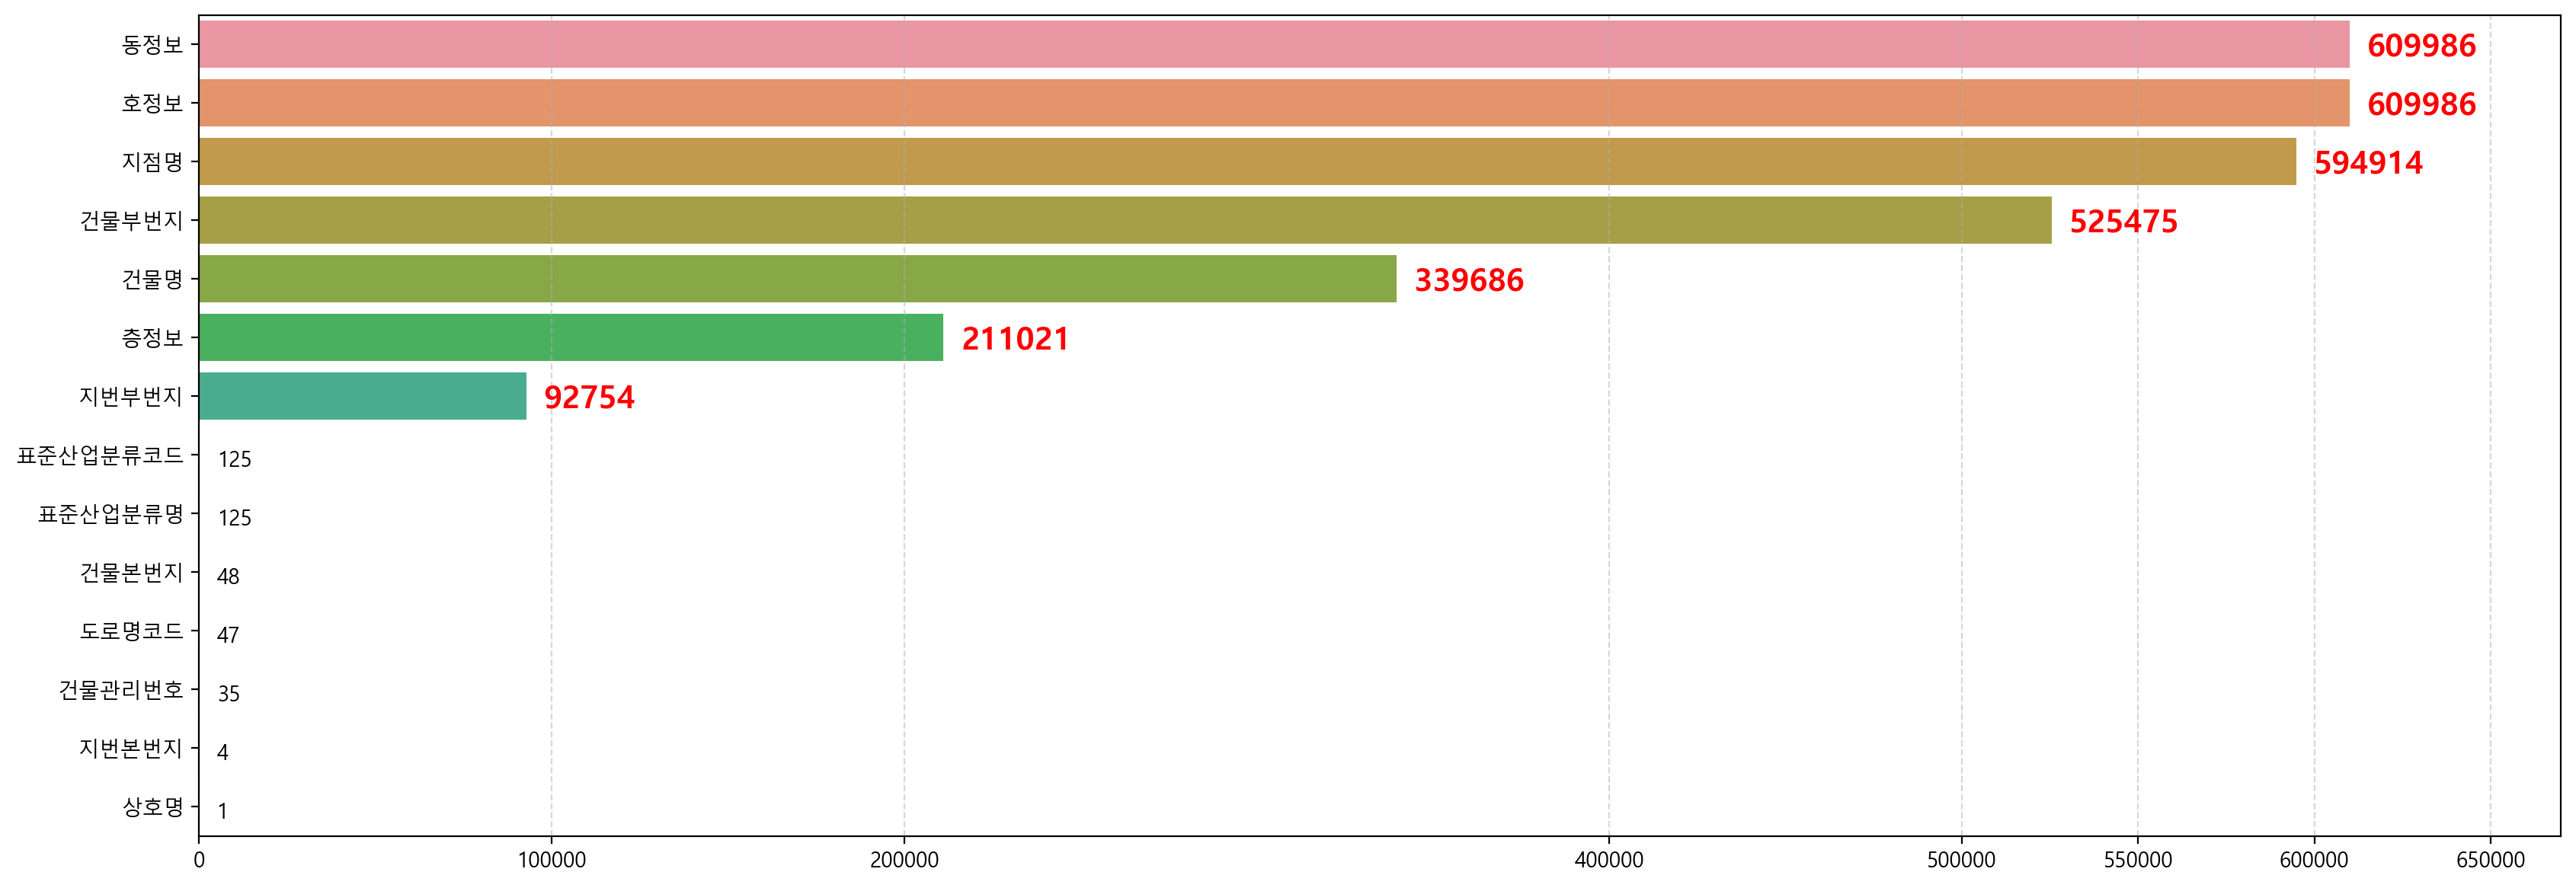

In [171]:
plt.figure(figsize=(20,7))
g = sns.barplot(data=only_missing_cnt_sorted.to_frame(),
               x= only_missing_cnt_sorted,
               y= only_missing_cnt_sorted.index)
g.set_xlim([0,670000])
g.set_xticks([0, 100000, 200000, 400000, 500000, 550000, 600000, 650000])
plt.grid(axis='x', linestyle='--', alpha=0.5) # x축만 점선 0.5만큼 투명한 점선 grid 추가
for i, v in enumerate(only_missing_cnt_sorted):
    if v<1000:
        plt.text(v+5000, i+0.2, v)
    else:
        plt.text(v+5000, i+0.2, v, color='r', fontweight='bold', fontsize=15)
plt.show()

## ⑤ missingno 라이브러리로 결측치 시각화
* [ResidentMario/missingno: Missing data visualization module for Python](https://github.com/ResidentMario/missingno)

* 위의 사이트를 열어 사용법 확인
`pip install missingno`

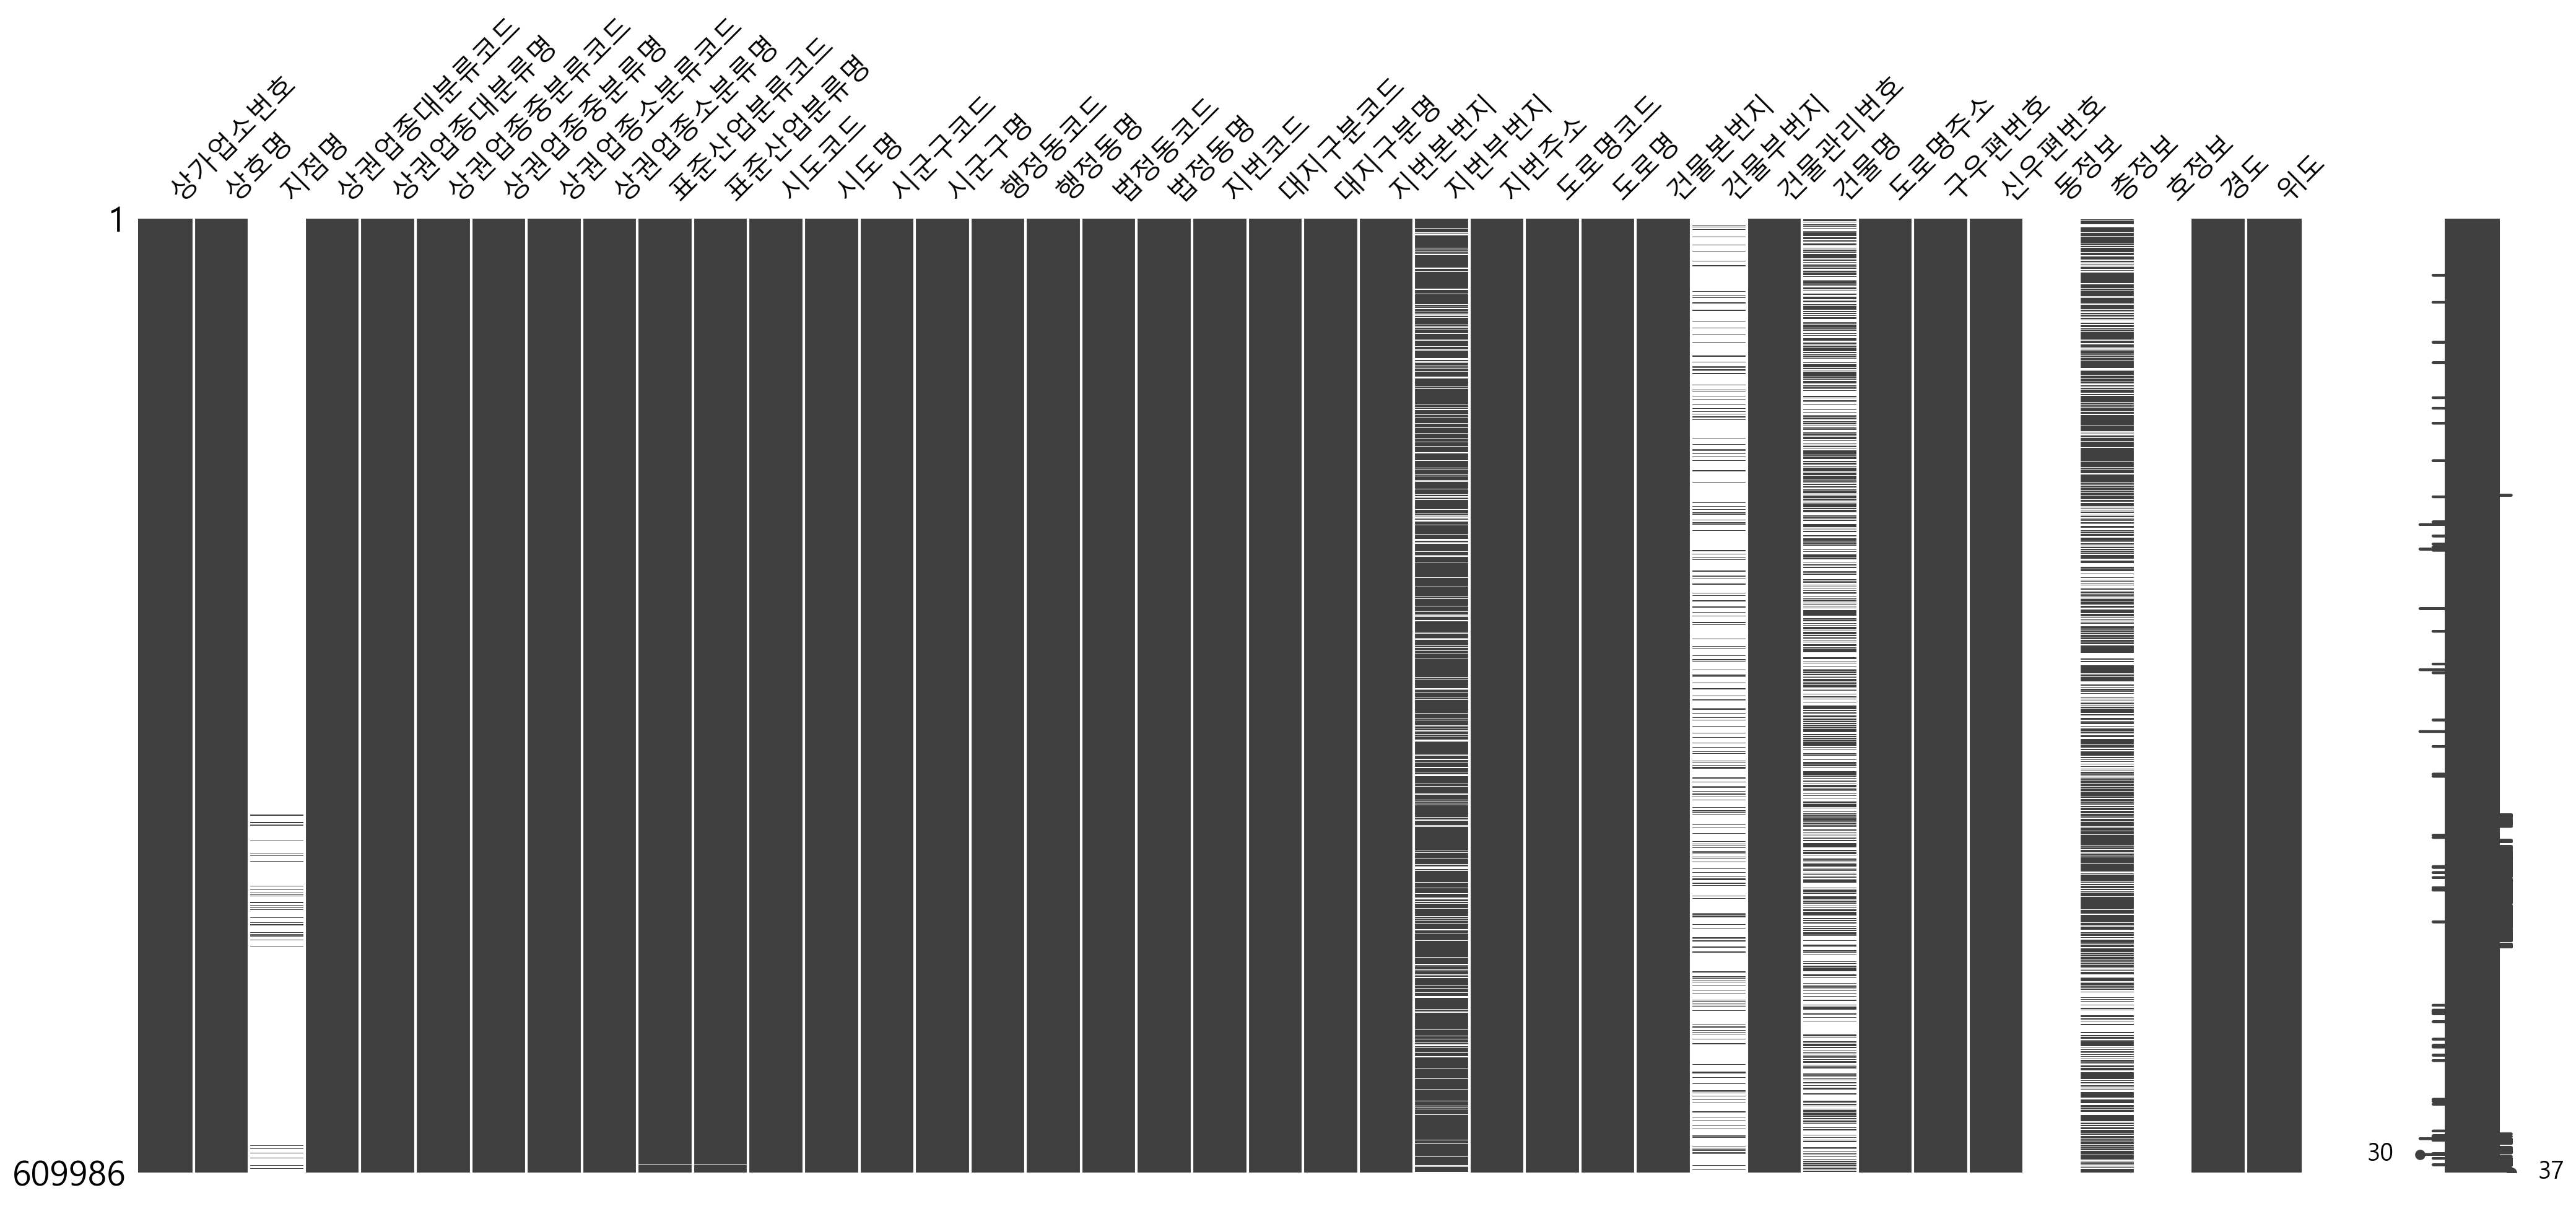

In [172]:
import missingno as msno
msno.matrix(df) # 결측치가 없는 부분은 검정색, 결측치 부분은 흰색
plt.show()

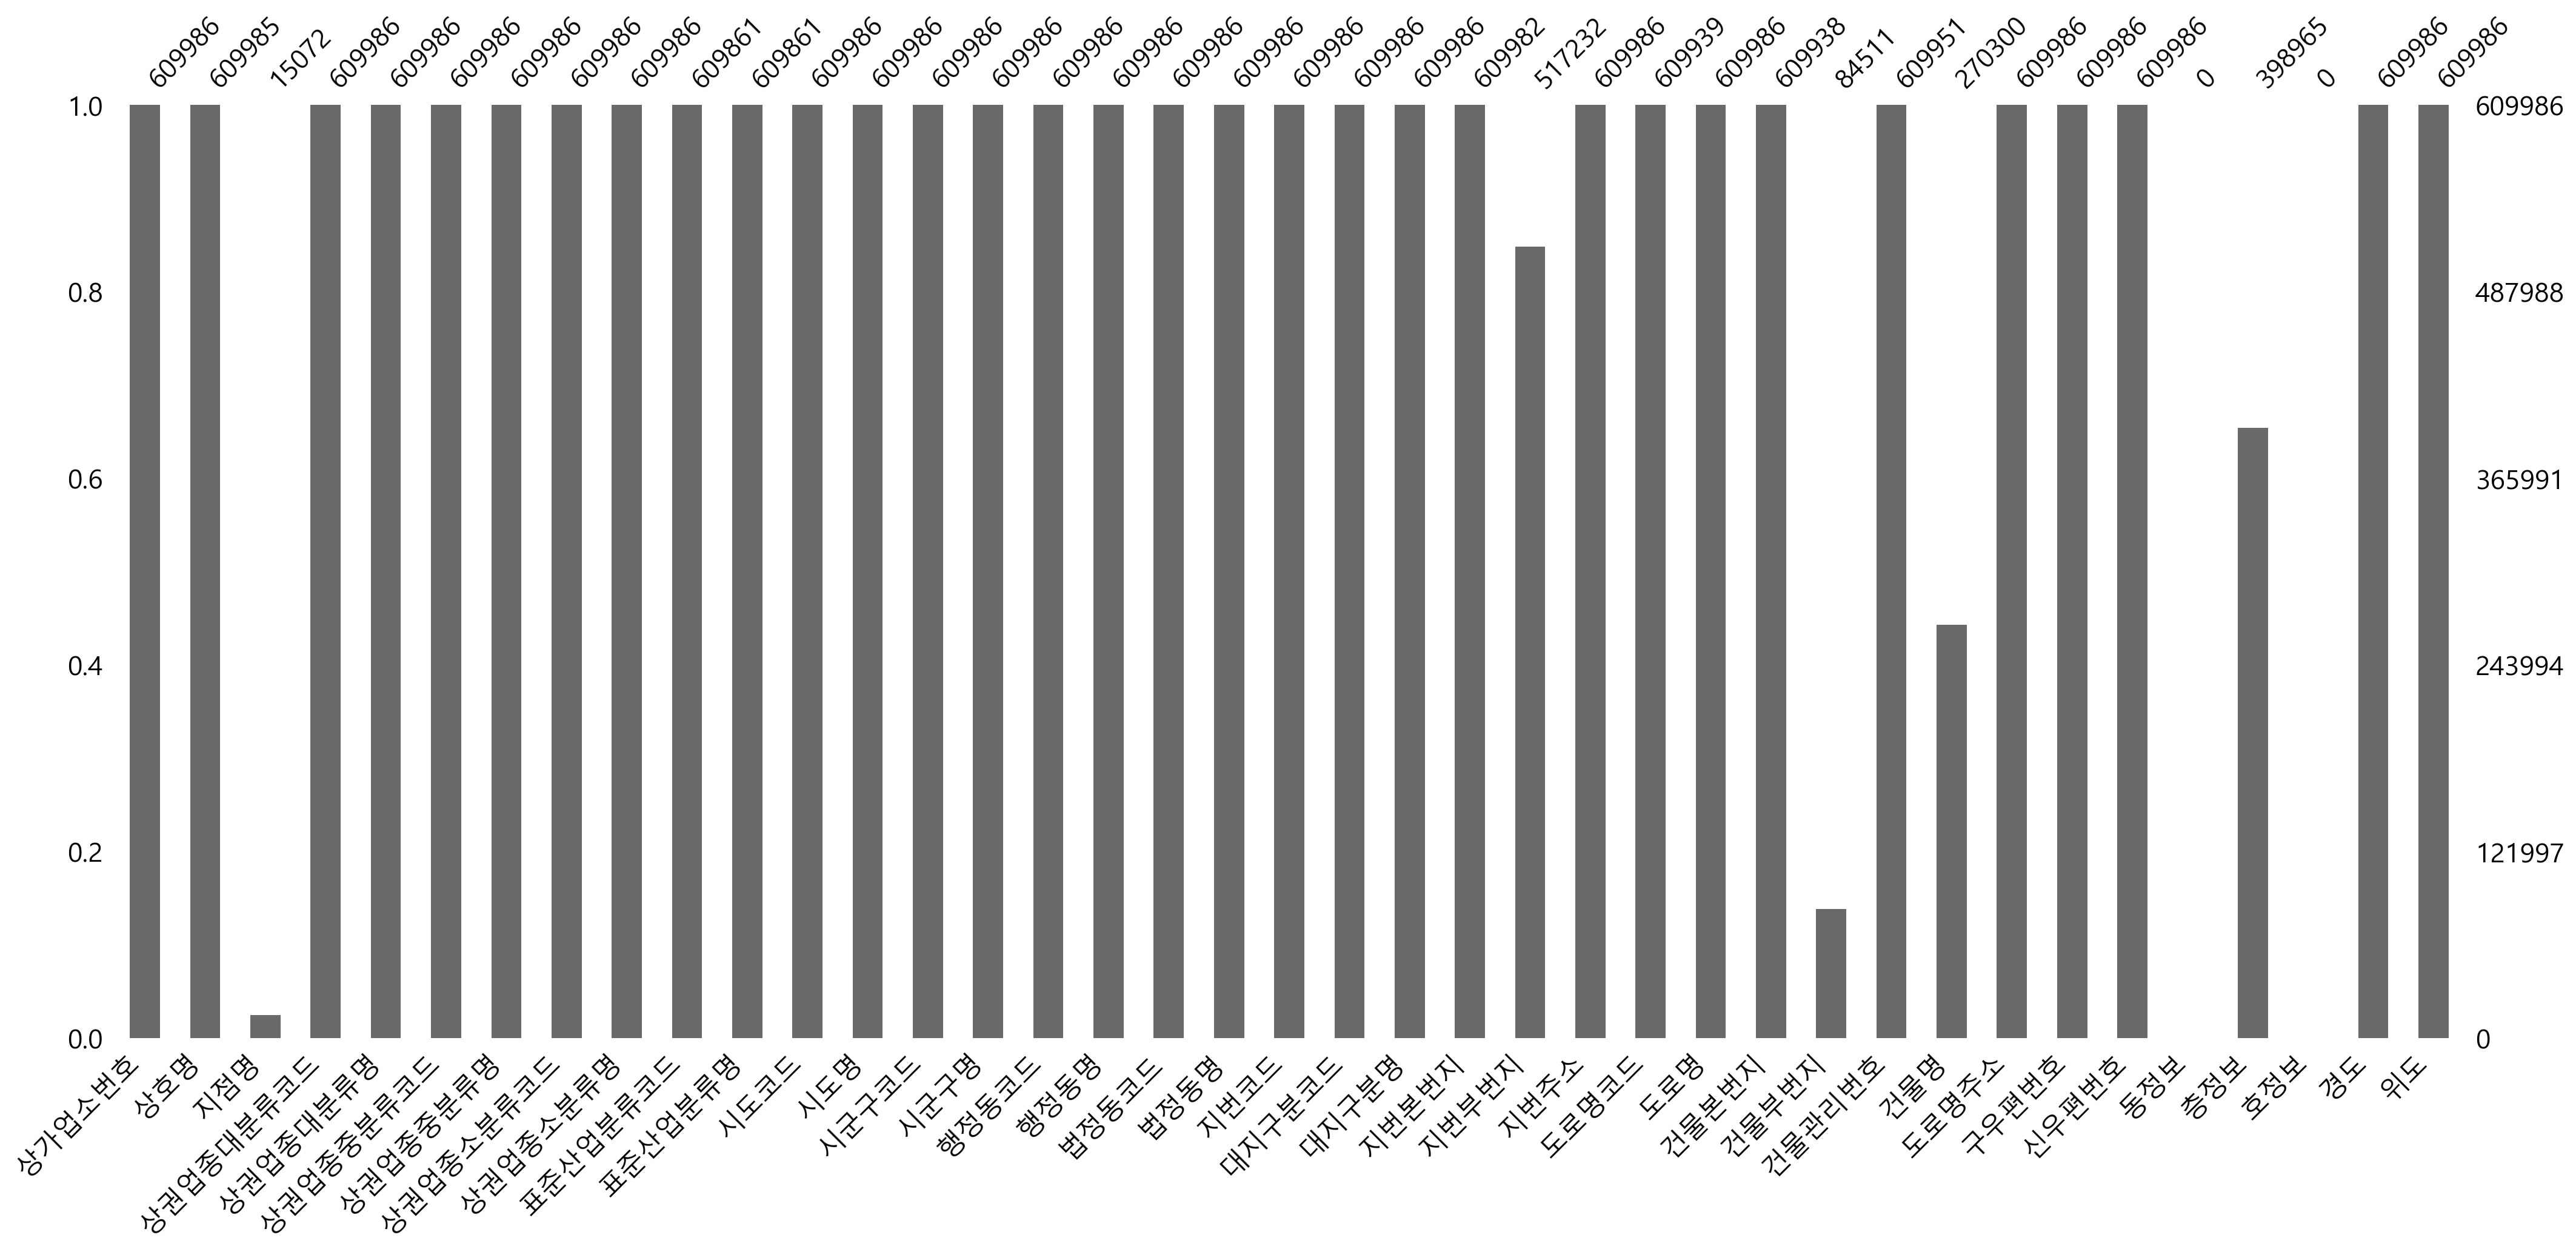

In [173]:
msno.bar(df) # 결측치가 아닌 컬럼 갯수를 barplot으로
plt.show()

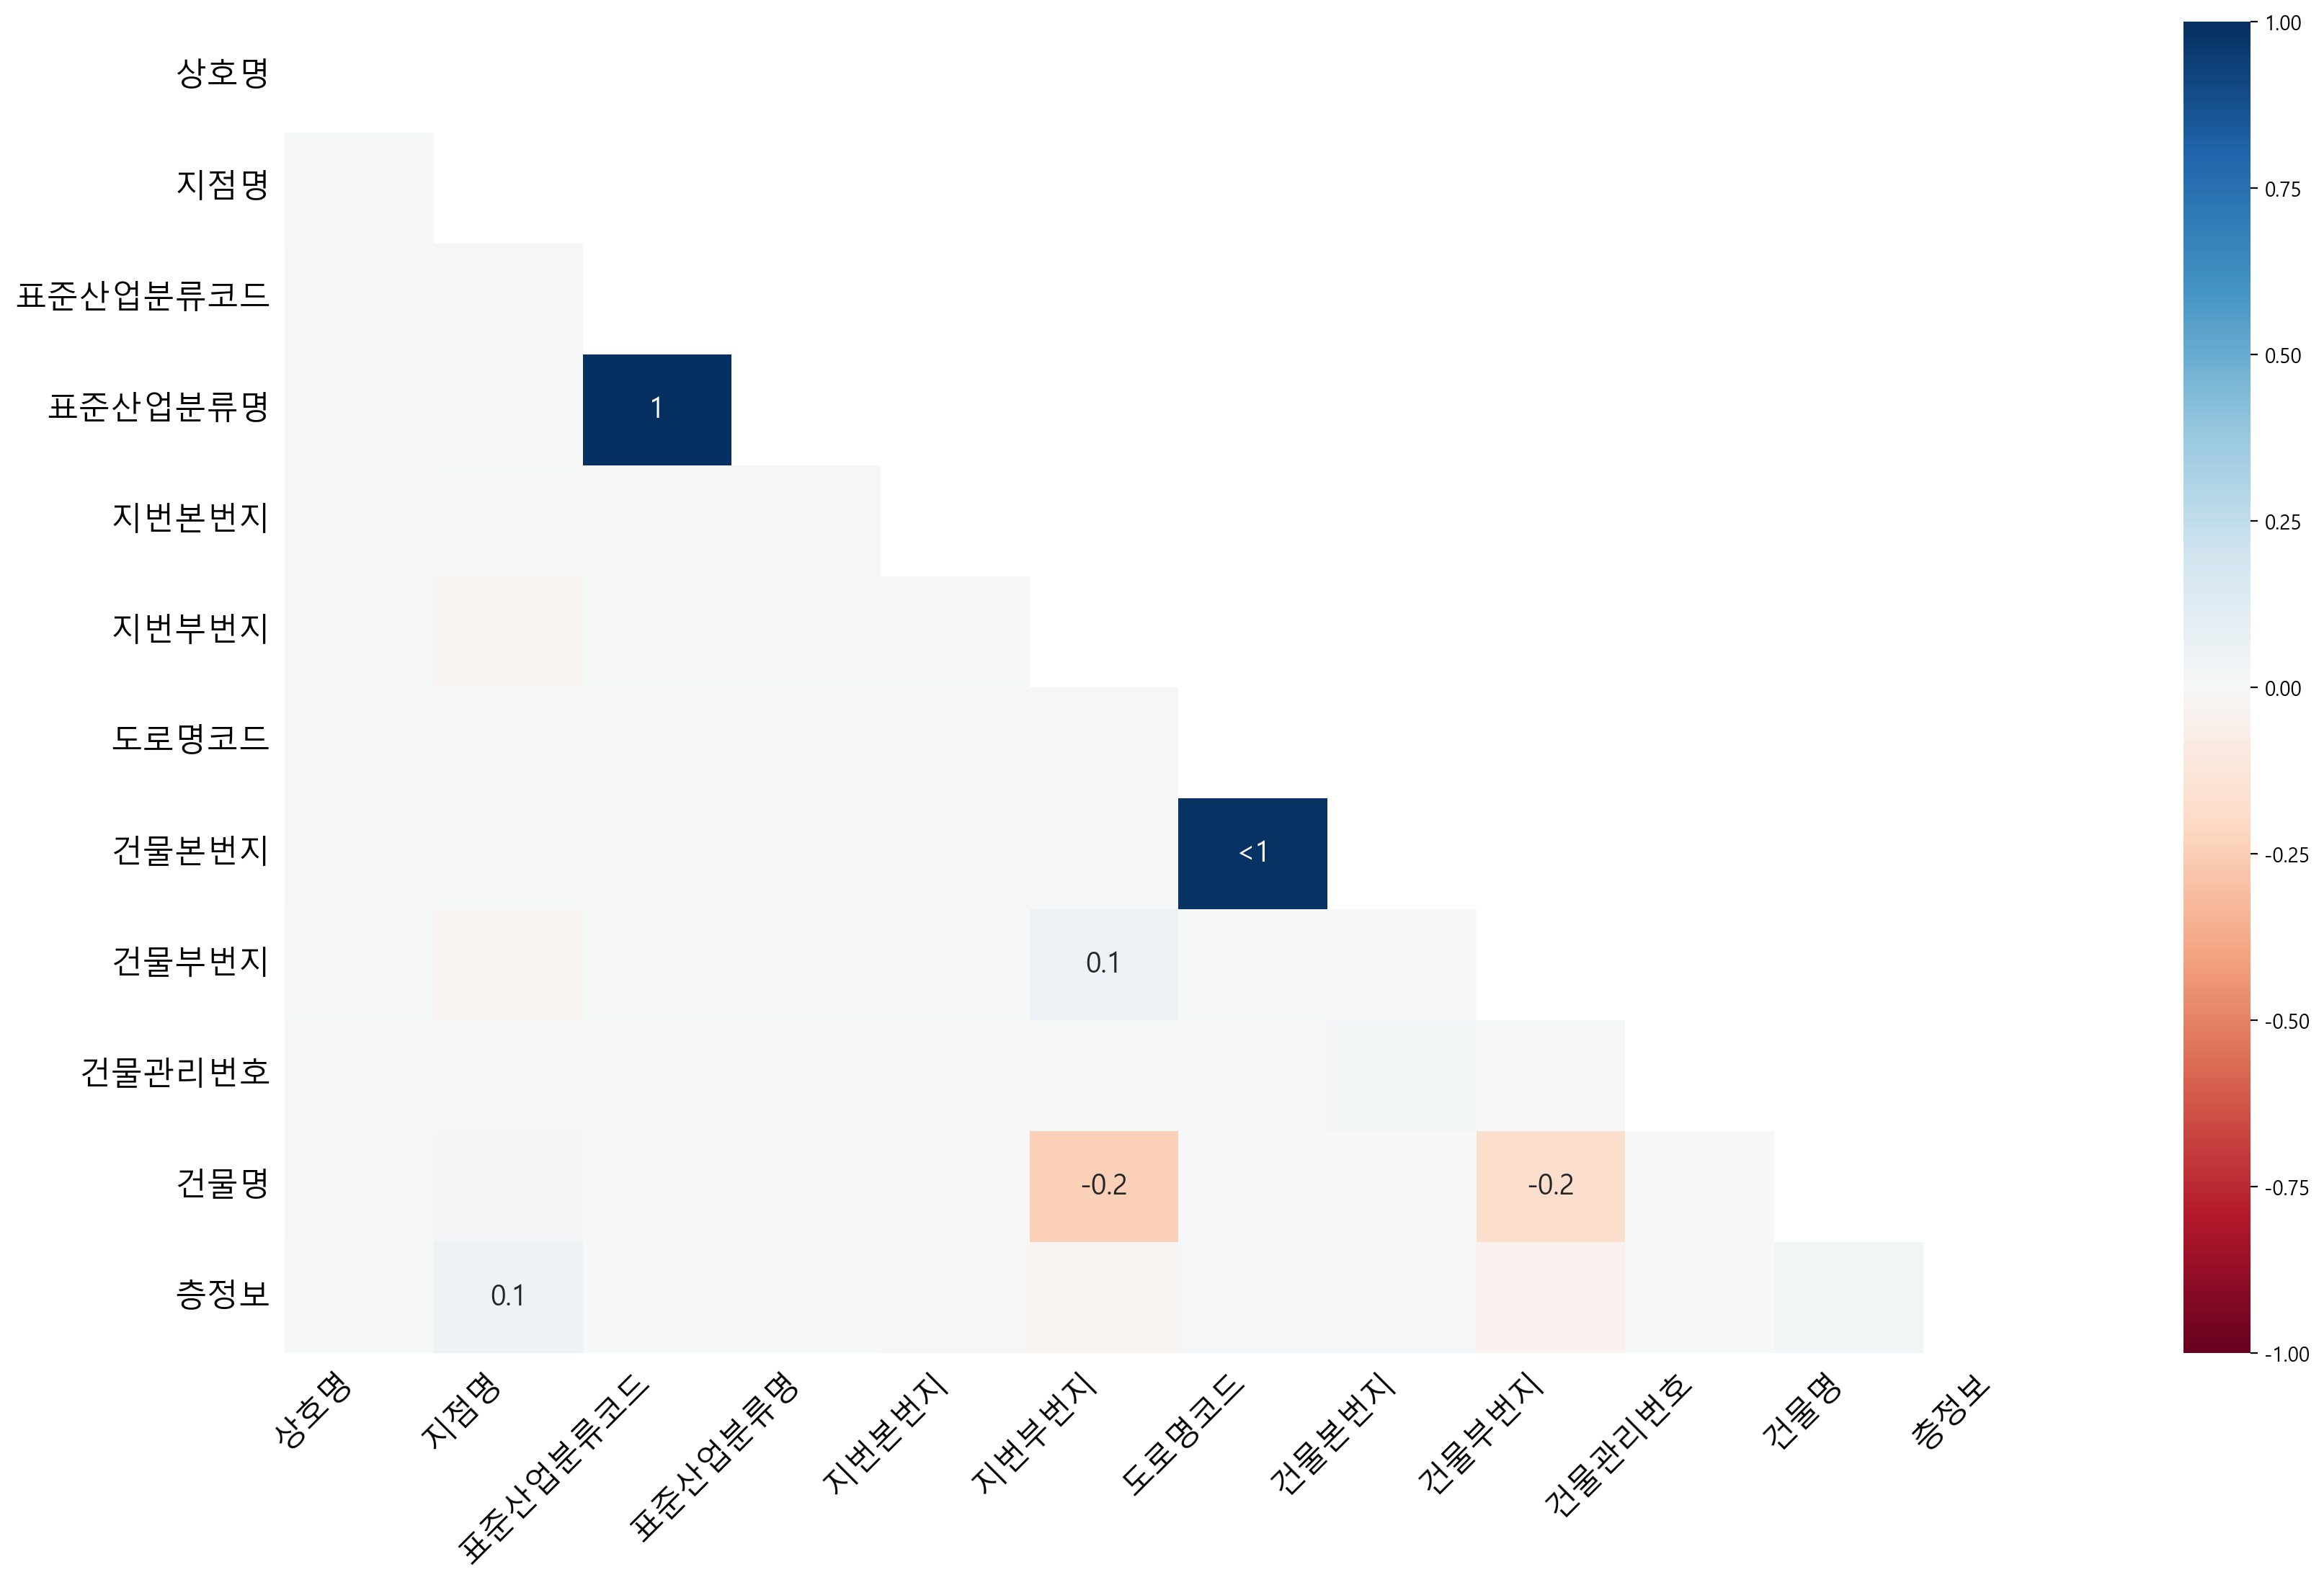

In [174]:
# 결측치가 있는 컬럼에 대해 변수별 상관관계
msno.heatmap(df)
plt.show()

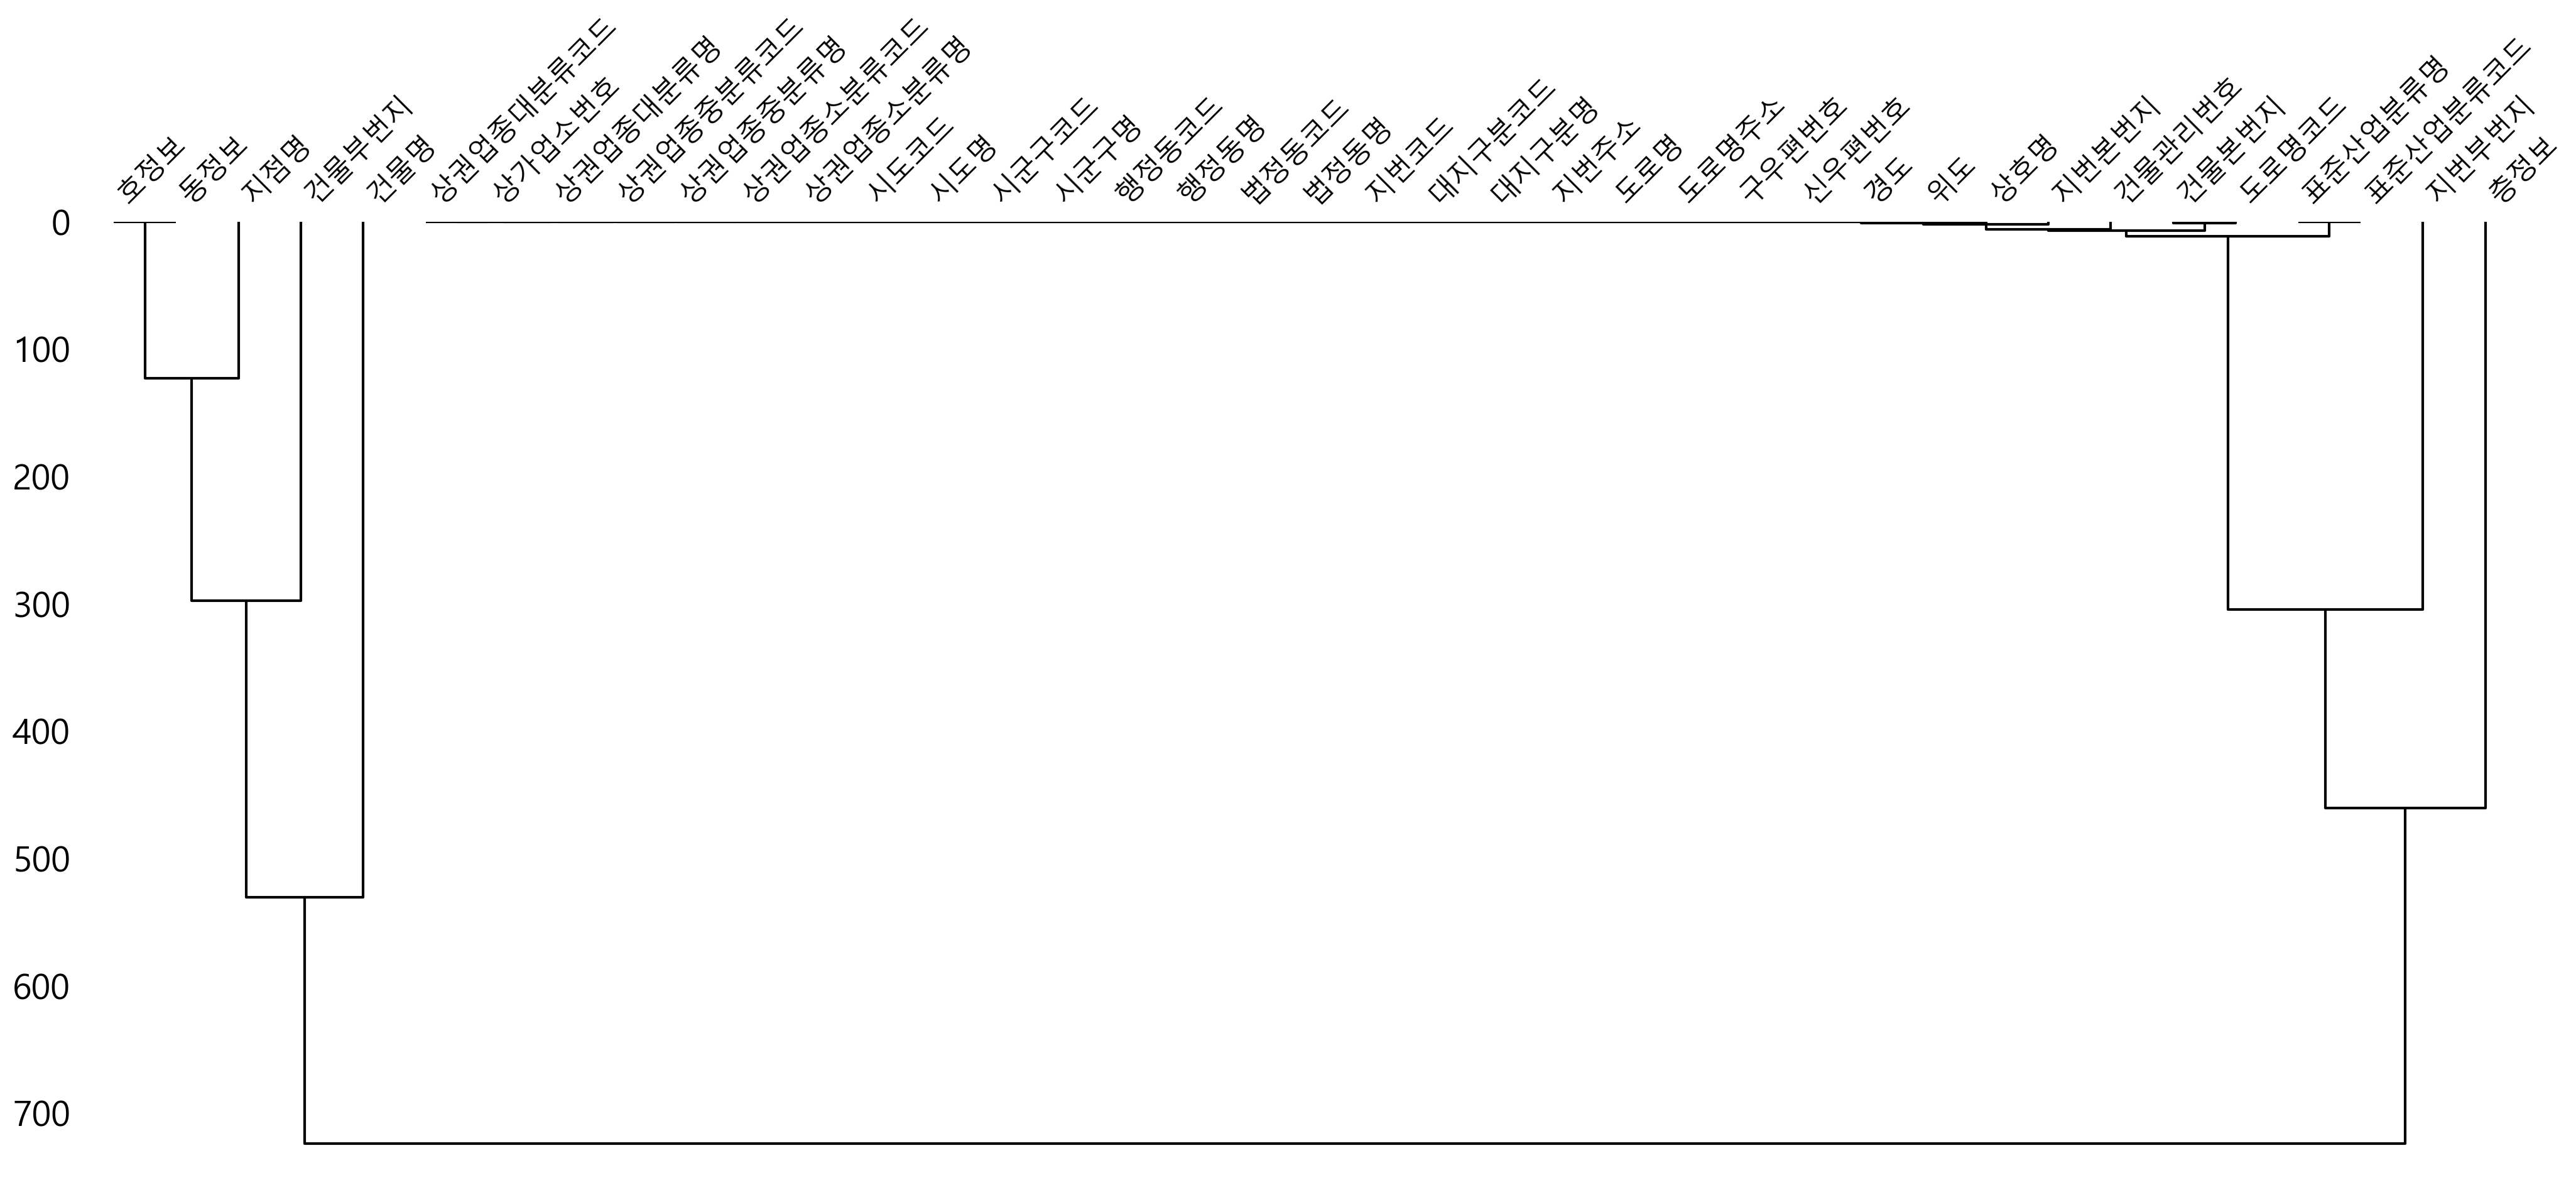

In [175]:
# dendrogram : 결측치가 있는 컬럼끼리 군집화
msno.dendrogram(df)
plt.show()

# 4.	df 데이터 셋에서 사용하지 않을 컬럼은 제거
## ①결측치가 너무 많은 컬럼은 제거한다. 결측치가 너무 많은 상위 9개 컬럼은 제거함.


In [9]:
# 결측치가 많은 컬럼 9개와 결측치 갯수
not_use = df.isnull().sum().sort_values(ascending=False).head(9)
not_use

호정보         609986
동정보         609986
지점명         594914
건물부번지       525475
건물명         339686
층정보         211021
지번부번지        92754
표준산업분류코드       125
표준산업분류명        125
dtype: int64

In [16]:
df.shape, len(df)

((609986, 39), 609986)

In [183]:
# 호정보 컬럼들의 결측치 비율
not_use['호정보'] / df.shape[0] * 100

100.0

In [10]:
# not_use 컬럼들의 결측치 비율
round(not_use / df.shape[0] * 100, 2)

호정보         100.00
동정보         100.00
지점명          97.53
건물부번지        86.15
건물명          55.69
층정보          34.59
지번부번지        15.21
표준산업분류코드      0.02
표준산업분류명       0.02
dtype: float64

In [26]:
not_use.index

Index(['호정보', '동정보', '지점명', '건물부번지', '건물명', '층정보', '지번부번지', '표준산업분류코드',
       '표준산업분류명'],
      dtype='object')

In [27]:
# not_use 컬럼들의 결측치 비율(표준산업분류명  0.02%) - 리스트컴프리헨션
for col, percent in zip(not_use.index, 
                        [str(round(x/len(df)*100, 2))+'%' for x in not_use]):
    print(col, percent)

호정보 100.0%
동정보 100.0%
지점명 97.53%
건물부번지 86.15%
건물명 55.69%
층정보 34.59%
지번부번지 15.21%
표준산업분류코드 0.02%
표준산업분류명 0.02%


In [24]:
# not_use 컬럼들의 결측치 비율(표준산업분류명  0.02%) - map
not_use.map(lambda x : str(round(x/len(df)*100, 2))+'%')

호정보         100.0%
동정보         100.0%
지점명         97.53%
건물부번지       86.15%
건물명         55.69%
층정보         34.59%
지번부번지       15.21%
표준산업분류코드     0.02%
표준산업분류명      0.02%
dtype: object

In [25]:
# not_use 컬럼들의 결측치 비율(표준산업분류명  0.02%) - apply
not_use.apply(lambda x : str(round(x/len(df)*100, 2))+'%')

호정보         100.0%
동정보         100.0%
지점명         97.53%
건물부번지       86.15%
건물명         55.69%
층정보         34.59%
지번부번지       15.21%
표준산업분류코드     0.02%
표준산업분류명      0.02%
dtype: object

In [29]:
not_use.index # 삭제할 컬럼명

Index(['호정보', '동정보', '지점명', '건물부번지', '건물명', '층정보', '지번부번지', '표준산업분류코드',
       '표준산업분류명'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609986 entries, 0 to 609985
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     609986 non-null  object 
 1   상호명        609985 non-null  object 
 2   지점명        15072 non-null   object 
 3   상권업종대분류코드  609986 non-null  object 
 4   상권업종대분류명   609986 non-null  object 
 5   상권업종중분류코드  609986 non-null  object 
 6   상권업종중분류명   609986 non-null  object 
 7   상권업종소분류코드  609986 non-null  object 
 8   상권업종소분류명   609986 non-null  object 
 9   표준산업분류코드   609861 non-null  object 
 10  표준산업분류명    609861 non-null  object 
 11  시도코드       609986 non-null  int64  
 12  시도명        609986 non-null  object 
 13  시군구코드      609986 non-null  int64  
 14  시군구명       609986 non-null  object 
 15  행정동코드      609986 non-null  int64  
 16  행정동명       609986 non-null  object 
 17  법정동코드      609986 non-null  int64  
 18  법정동명       609986 non-null  object 
 19  지번코드       609986 non-n

In [33]:
# 컬럼 삭제전 메모리 사용량(181.5+ MB), 컬럼수
print('컬럼 제거 전 shape :', df.shape)
df.drop(not_use.index, axis=1, inplace=True)
# 컬럼 삭제후 메모리 사용량(139.6+ MB), 컬럼수
print('컬럼 제거 후 shape :', df.shape)

컬럼 제거 전 shape : (609986, 39)
컬럼 제거 후 shape : (609986, 30)


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609986 entries, 0 to 609985
Data columns (total 30 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     609986 non-null  object 
 1   상호명        609985 non-null  object 
 2   상권업종대분류코드  609986 non-null  object 
 3   상권업종대분류명   609986 non-null  object 
 4   상권업종중분류코드  609986 non-null  object 
 5   상권업종중분류명   609986 non-null  object 
 6   상권업종소분류코드  609986 non-null  object 
 7   상권업종소분류명   609986 non-null  object 
 8   시도코드       609986 non-null  int64  
 9   시도명        609986 non-null  object 
 10  시군구코드      609986 non-null  int64  
 11  시군구명       609986 non-null  object 
 12  행정동코드      609986 non-null  int64  
 13  행정동명       609986 non-null  object 
 14  법정동코드      609986 non-null  int64  
 15  법정동명       609986 non-null  object 
 16  지번코드       609986 non-null  int64  
 17  대지구분코드     609986 non-null  int64  
 18  대지구분명      609986 non-null  object 
 19  지번본번지      609982 non-n

## ②	컬럼명에 “코드”나 “번호”가 있는 컬럼은 분석에 사용되지 않을 예정입니다. 제거함

In [36]:
# 컬럼명
cols = df.columns
cols

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도코드', '시도명', '시군구코드', '시군구명', '행정동코드',
       '행정동명', '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소',
       '도로명코드', '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도',
       '위도'],
      dtype='object')

**※ 시리즈에 문자함수를 쓰기 위해 참조 :**
https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [44]:
# cols에 '코드'나 '번호'가 포함되어 있는 컬럼명 추출
cols[(cols.str.find('코드')!=-1) | (cols.str.find('번호')!=-1)]

Index(['상가업소번호', '상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '시도코드', '시군구코드',
       '행정동코드', '법정동코드', '지번코드', '대지구분코드', '도로명코드', '건물관리번호', '구우편번호',
       '신우편번호'],
      dtype='object')

In [49]:
drop_cols = cols[cols.str.contains('코드|번호')] # 코드나 번호가 포함되어 있으면 true
drop_cols

Index(['상가업소번호', '상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '시도코드', '시군구코드',
       '행정동코드', '법정동코드', '지번코드', '대지구분코드', '도로명코드', '건물관리번호', '구우편번호',
       '신우편번호'],
      dtype='object')

In [51]:
print('제거 전 shape :', df.shape)
df.drop(drop_cols, axis=1, inplace=True)
print('제거 후 shape :', df.shape)

제거 전 shape : (609986, 30)
제거 후 shape : (609986, 16)


In [52]:
# info를 통해 컬럼 정보와 메모리 사용량 등을 확인(181.5MB -> 139.6+ MB -> 74.5+ MB)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609986 entries, 0 to 609985
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       609985 non-null  object 
 1   상권업종대분류명  609986 non-null  object 
 2   상권업종중분류명  609986 non-null  object 
 3   상권업종소분류명  609986 non-null  object 
 4   시도명       609986 non-null  object 
 5   시군구명      609986 non-null  object 
 6   행정동명      609986 non-null  object 
 7   법정동명      609986 non-null  object 
 8   대지구분명     609986 non-null  object 
 9   지번본번지     609982 non-null  float64
 10  지번주소      609986 non-null  object 
 11  도로명       609986 non-null  object 
 12  건물본번지     609938 non-null  float64
 13  도로명주소     609986 non-null  object 
 14  경도        609986 non-null  float64
 15  위도        609986 non-null  float64
dtypes: float64(4), object(12)
memory usage: 74.5+ MB


# ※ df 파일io

In [53]:
df.to_csv(r'D:\ai\Downloads\shareData\상가정보\서울부산상가정보(최종).csv',
         index=False,
         encoding='cp949')

In [3]:
df = pd.read_csv(r'D:\ai\Downloads\shareData\상가정보\서울부산상가정보(최종).csv',
                encoding='cp949')

# 5. df 데이터 셋의 값을 가져온다(loc함수, iloc함수등을 사용하기도 하고 사용하지 않기도 하며 서브셋을 가져온다)
## ① 상호명 필드만 가져온다


In [57]:
df['상호명'] # 시리즈
df[['상호명']] # 데이터프레임

,상호명
0,이상한스냅
1,토끼정
2,가배차
3,비에이치씨항동점
4,무지개삼성약국
...,...
609981,수연식당
609982,페스티발가라오케
609983,웰컴투뮤즈월드
609984,슈아브


In [58]:
df.loc[:, '상호명'] # 시리즈
df.loc[:, ['상호명']] # 데이터 프레임

,상호명
0,이상한스냅
1,토끼정
2,가배차
3,비에이치씨항동점
4,무지개삼성약국
...,...
609981,수연식당
609982,페스티발가라오케
609983,웰컴투뮤즈월드
609984,슈아브


In [64]:
df.iloc[:,0] # 시리즈
df.iloc[:, 0:1] # 데이터 프레임
df.iloc[:, [0]] # 데이터 프레임

,상호명
0,이상한스냅
1,토끼정
2,가배차
3,비에이치씨항동점
4,무지개삼성약국
...,...
609981,수연식당
609982,페스티발가라오케
609983,웰컴투뮤즈월드
609984,슈아브


## ②상호명의 종류별 데이터수를 가져온다(df.상호명.value_counts()이용)

In [67]:
# 상호명의 데이터 종류
df['상호명'].unique()

array(['이상한스냅', '토끼정', '가배차', ..., '페스티발가라오케', '웰컴투뮤즈월드', '공동법률사무소문정'],
      dtype=object)

In [68]:
# value_counts() : 자동정렬
df.상호명.value_counts()

컴퓨터수리         538
김밥천국          235
현대공인중개사사무소    190
삼성공인중개사사무소    189
입주청소          184
             ... 
잭인디자인           1
미림기획            1
통큰낙지            1
법무사추교욱사무소       1
공동법률사무소문정       1
Name: 상호명, Length: 467213, dtype: int64

In [70]:
df.isna().sum() # 결측치가 없는 열 확인용(groupby 사용)

상호명          1
상권업종대분류명     0
상권업종중분류명     0
상권업종소분류명     0
시도명          0
시군구명         0
행정동명         0
법정동명         0
대지구분명        0
지번본번지        4
지번주소         0
도로명          0
건물본번지       48
도로명주소        0
경도           0
위도           0
dtype: int64

In [101]:
# groupby
df.groupby('상호명')['경도'].count().sort_values(ascending=False) # 결과 : 시리즈
r = df.groupby('상호명')[['경도']].count().sort_values(by='경도', ascending=False) # 결과 : 데이터 프레임
r.columns = ['count']
r.index.name = None
r

,count
컴퓨터수리,538
김밥천국,235
현대공인중개사사무소,190
삼성공인중개사사무소,189
입주청소,184
...,...
본씨앤씨,1
본심돼지국밥,1
본시스템,1
본시구도,1


In [86]:
# pivot_table
r = df.pivot_table(index='상호명',
              values='경도',
              aggfunc='count').sort_values(by='경도',ascending=False)
r.columns = ['count']
r

,count
상호명,
컴퓨터수리,538
김밥천국,235
현대공인중개사사무소,190
삼성공인중개사사무소,189
입주청소,184
...,...
본씨앤씨,1
본심돼지국밥,1
본시스템,1


## ③	“상호명”과 "도로명주소” 컬럼 가져오기

In [94]:
df[['상호명','도로명주소']]
df.loc[:, ['상호명','도로명주소']]
df.loc[..., ['상호명','도로명주소']]

,상호명,도로명주소
0,이상한스냅,서울특별시 양천구 월정로 283
1,토끼정,서울특별시 강서구 마곡동로 55
2,가배차,서울특별시 송파구 가락로 209
3,비에이치씨항동점,서울특별시 구로구 연동로 233
4,무지개삼성약국,서울특별시 강남구 일원로 45
...,...,...
609981,수연식당,부산광역시 해운대구 재반로 207-1
609982,페스티발가라오케,부산광역시 해운대구 구남로 29
609983,웰컴투뮤즈월드,부산광역시 부산진구 중앙대로680번길 22
609984,슈아브,부산광역시 서구 구덕로 147


## ④ 0~2행을 출력하라 (head()함수를 이용하지 않고, loc과 iloc을 이용)

In [95]:
df.loc[[0,1,2]]
df.loc[0:2]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,이상한스냅,과학·기술,사진 촬영,사진촬영업,서울특별시,양천구,신월5동,신월동,대지,9.0,서울특별시 양천구 신월동 9-4,서울특별시 양천구 월정로,283.0,서울특별시 양천구 월정로 283,126.828832,37.542117
1,토끼정,음식,한식,백반/한정식,서울특별시,강서구,가양1동,마곡동,대지,774.0,서울특별시 강서구 마곡동 774-12,서울특별시 강서구 마곡동로,55.0,서울특별시 강서구 마곡동로 55,126.833022,37.560053
2,가배차,음식,한식,백반/한정식,서울특별시,송파구,송파1동,송파동,대지,143.0,서울특별시 송파구 송파동 143-2,서울특별시 송파구 가락로,209.0,서울특별시 송파구 가락로 209,127.116136,37.507170


In [97]:
df.iloc[[0,1,2]]
df.iloc[0:3] # iloc의 슬라이싱의 경우 3이 미포함

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,이상한스냅,과학·기술,사진 촬영,사진촬영업,서울특별시,양천구,신월5동,신월동,대지,9.0,서울특별시 양천구 신월동 9-4,서울특별시 양천구 월정로,283.0,서울특별시 양천구 월정로 283,126.828832,37.542117
1,토끼정,음식,한식,백반/한정식,서울특별시,강서구,가양1동,마곡동,대지,774.0,서울특별시 강서구 마곡동 774-12,서울특별시 강서구 마곡동로,55.0,서울특별시 강서구 마곡동로 55,126.833022,37.560053
2,가배차,음식,한식,백반/한정식,서울특별시,송파구,송파1동,송파동,대지,143.0,서울특별시 송파구 송파동 143-2,서울특별시 송파구 가락로,209.0,서울특별시 송파구 가락로 209,127.116136,37.507170


In [99]:
df[0:3] # df 인덱싱안에는 열이름, 조건, 슬라이싱, 열이름리스트

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,이상한스냅,과학·기술,사진 촬영,사진촬영업,서울특별시,양천구,신월5동,신월동,대지,9.0,서울특별시 양천구 신월동 9-4,서울특별시 양천구 월정로,283.0,서울특별시 양천구 월정로 283,126.828832,37.542117
1,토끼정,음식,한식,백반/한정식,서울특별시,강서구,가양1동,마곡동,대지,774.0,서울특별시 강서구 마곡동 774-12,서울특별시 강서구 마곡동로,55.0,서울특별시 강서구 마곡동로 55,126.833022,37.560053
2,가배차,음식,한식,백반/한정식,서울특별시,송파구,송파1동,송파동,대지,143.0,서울특별시 송파구 송파동 143-2,서울특별시 송파구 가락로,209.0,서울특별시 송파구 가락로 209,127.116136,37.507170


In [104]:
# 0,1,2행의 '상호명'과'도로명주소'
df.loc[0:2, ['상호명','도로명주소']]

,상호명,도로명주소
0,이상한스냅,서울특별시 양천구 월정로 283
1,토끼정,서울특별시 강서구 마곡동로 55
2,가배차,서울특별시 송파구 가락로 209


In [106]:
df.iloc[0:3, [0, -3]]

,상호명,도로명주소
0,이상한스냅,서울특별시 양천구 월정로 283
1,토끼정,서울특별시 강서구 마곡동로 55
2,가배차,서울특별시 송파구 가락로 209


# 6. 기술 통계값 보기 
- [Descriptive statistics - Wikipedia](https://en.wikipedia.org/wiki/Descriptive_statistics)

- [Computations / descriptive stats](https://pandas.pydata.org/docs/reference/frame.html#computations-descriptive-stats)

- [표준 편차 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/표준편차)

* describe()를 사용하면 데이터 요약을 볼 수 있음(기술통계량)
    - 기본적으로 수치형 데이터를 요약
    - include, exclude 옵션으로 다른 데이터 타입의 요약 수치 출력
    - count, min, max, mean, median, 1사분위수, 3사분위수
## ①	df 데이터셋의 요약기술 통계량

In [108]:
# DataFrame.count: Count number of non-NA/null observations.
# DataFrame.max: Maximum of the values in the object.
# DataFrame.min: Minimum of the values in the object.
# DataFrame.mean: Mean of the values.
# DataFrame.std: Standard deviation of the observations.
# DataFrame.select_dtypes: Subset of a DataFrame including/excluding
#     columns based on their dtype.
df.describe() # 수치형에 대한 기술통계량

,지번본번지,건물본번지,경도,위도
count,609982.000000,609938.000000,609986.000000,609986.000000
mean,479.070207,141.448121,127.481619,36.979900
std,512.968021,259.848733,0.883372,1.009612
min,1.000000,1.000000,126.768169,34.989761
25%,110.000000,18.000000,126.945278,37.468926
50%,333.000000,46.000000,127.035424,37.512625
75%,680.000000,149.000000,127.140580,37.559846
max,9999.000000,3646.000000,129.294090,37.692595


In [111]:
df.describe(include='object') # object형에 대한 기술 통계량

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소
count,609985,609986,609986,609986,609986,609986,609986,609986,609986,609986,609986,609986
unique,467213,10,75,247,2,39,628,647,2,215781,18505,211569
top,컴퓨터수리,음식,한식,백반/한정식,서울특별시,강남구,역삼1동,서초동,대지,서울특별시 송파구 문정동 634,서울특별시 강남구 테헤란로,서울특별시 송파구 충민로 66
freq,538,178199,65928,31809,466022,55818,11960,15880,609079,884,3905,1125


In [112]:
df.describe(include='all')  # 모든 데이터 타입에 대해 기술통계량

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
count,609985,609986,609986,609986,609986,609986,609986,609986,609986,609982.000000,609986,609986,609938.000000,609986,609986.000000,609986.000000
unique,467213,10,75,247,2,39,628,647,2,NaN,215781,18505,NaN,211569,NaN,NaN
top,컴퓨터수리,음식,한식,백반/한정식,서울특별시,강남구,역삼1동,서초동,대지,NaN,서울특별시 송파구 문정동 634,서울특별시 강남구 테헤란로,NaN,서울특별시 송파구 충민로 66,NaN,NaN
freq,538,178199,65928,31809,466022,55818,11960,15880,609079,NaN,884,3905,NaN,1125,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,479.070207,NaN,NaN,141.448121,NaN,127.481619,36.979900
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,512.968021,NaN,NaN,259.848733,NaN,0.883372,1.009612
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,126.768169,34.989761
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.000000,NaN,NaN,18.000000,NaN,126.945278,37.468926
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,333.000000,NaN,NaN,46.000000,NaN,127.035424,37.512625
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,680.000000,NaN,NaN,149.000000,NaN,127.140580,37.559846


In [113]:
df.describe(exclude='object') # object형은 제외한 기술통계량

,지번본번지,건물본번지,경도,위도
count,609982.000000,609938.000000,609986.000000,609986.000000
mean,479.070207,141.448121,127.481619,36.979900
std,512.968021,259.848733,0.883372,1.009612
min,1.000000,1.000000,126.768169,34.989761
25%,110.000000,18.000000,126.945278,37.468926
50%,333.000000,46.000000,127.035424,37.512625
75%,680.000000,149.000000,127.140580,37.559846
max,9999.000000,3646.000000,129.294090,37.692595


In [115]:
df.describe(exclude=['object','int64']) # 'object','int64'형을 제외한 기술통계량

,지번본번지,건물본번지,경도,위도
count,609982.000000,609938.000000,609986.000000,609986.000000
mean,479.070207,141.448121,127.481619,36.979900
std,512.968021,259.848733,0.883372,1.009612
min,1.000000,1.000000,126.768169,34.989761
25%,110.000000,18.000000,126.945278,37.468926
50%,333.000000,46.000000,127.035424,37.512625
75%,680.000000,149.000000,127.140580,37.559846
max,9999.000000,3646.000000,129.294090,37.692595


## ②	df 데이터셋의 “지번본번지", "건물본번지” 컬럼의 데이터 개수와  dtype 메모리 사용량을 확인한다.

In [117]:
df[['지번본번지','건물본번지']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609986 entries, 0 to 609985
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   지번본번지   609982 non-null  float64
 1   건물본번지   609938 non-null  float64
dtypes: float64(2)
memory usage: 9.3 MB


In [119]:
# DataFrame.select_dtypes: Subset of a DataFrame including/excluding
#     columns based on their dtype.
# float64 서브셋
df.select_dtypes(include=['float64','int64'])

,지번본번지,건물본번지,경도,위도
0,9.0,283.0,126.828832,37.542117
1,774.0,55.0,126.833022,37.560053
2,143.0,209.0,127.116136,37.507170
3,100.0,233.0,126.820686,37.481640
4,684.0,45.0,127.081499,37.489893
...,...,...,...,...
609981,1291.0,207.0,129.130625,35.195837
609982,1393.0,29.0,129.161026,35.161522
609983,226.0,22.0,129.060463,35.153214
609984,54.0,147.0,129.020472,35.097986


In [120]:
# float64를 제외한 서브셋 추출
df.select_dtypes(exclude='float64')

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소
0,이상한스냅,과학·기술,사진 촬영,사진촬영업,서울특별시,양천구,신월5동,신월동,대지,서울특별시 양천구 신월동 9-4,서울특별시 양천구 월정로,서울특별시 양천구 월정로 283
1,토끼정,음식,한식,백반/한정식,서울특별시,강서구,가양1동,마곡동,대지,서울특별시 강서구 마곡동 774-12,서울특별시 강서구 마곡동로,서울특별시 강서구 마곡동로 55
2,가배차,음식,한식,백반/한정식,서울특별시,송파구,송파1동,송파동,대지,서울특별시 송파구 송파동 143-2,서울특별시 송파구 가락로,서울특별시 송파구 가락로 209
3,비에이치씨항동점,음식,기타 간이,치킨,서울특별시,구로구,항동,항동,대지,서울특별시 구로구 항동 100-5,서울특별시 구로구 연동로,서울특별시 구로구 연동로 233
4,무지개삼성약국,소매,의약·화장품 소매,약국,서울특별시,강남구,일원1동,일원동,대지,서울특별시 강남구 일원동 684-5,서울특별시 강남구 일원로,서울특별시 강남구 일원로 45
...,...,...,...,...,...,...,...,...,...,...,...,...
609981,수연식당,음식,한식,백반/한정식,부산광역시,해운대구,반여2동,반여동,대지,부산광역시 해운대구 반여동 1291-820,부산광역시 해운대구 재반로,부산광역시 해운대구 재반로 207-1
609982,페스티발가라오케,음식,주점,요리 주점,부산광역시,해운대구,중1동,중동,대지,부산광역시 해운대구 중동 1393-5,부산광역시 해운대구 구남로,부산광역시 해운대구 구남로 29
609983,웰컴투뮤즈월드,교육,교육 지원,교육컨설팅업,부산광역시,부산진구,부전2동,부전동,대지,부산광역시 부산진구 부전동 226-1,부산광역시 부산진구 중앙대로680번길,부산광역시 부산진구 중앙대로680번길 22
609984,슈아브,음식,비알코올,카페,부산광역시,서구,초장동,초장동,대지,부산광역시 서구 초장동 54-3,부산광역시 서구 구덕로,부산광역시 서구 구덕로 147


## ③	“위도", "경도” 컬럼만의 요약 기술통계량

In [121]:
df[['위도','경도']].describeribe()

,위도,경도
count,609986.000000,609986.000000
mean,36.979900,127.481619
std,1.009612,0.883372
min,34.989761,126.768169
25%,37.468926,126.945278
50%,37.512625,127.035424
75%,37.559846,127.140580
max,37.692595,129.294090


# 7.단별량 수치형 변수 시각화
## ① 위도의 빈도표를 시각화 : plot.hist, hist, sns.displot, sns.histplot

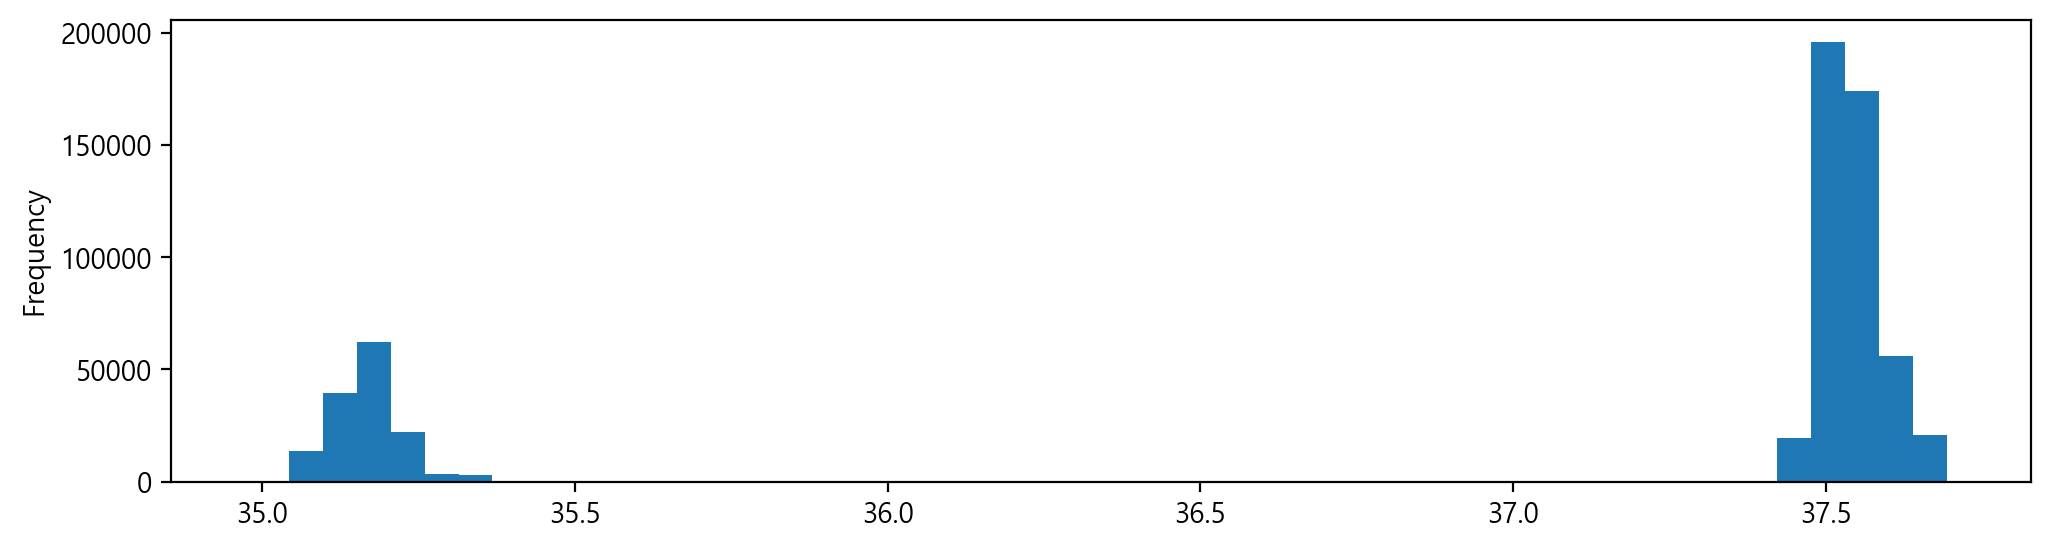

In [133]:
plt.figure(figsize=(12,3))
df['위도'].plot.hist(bins=50)
plt.show()

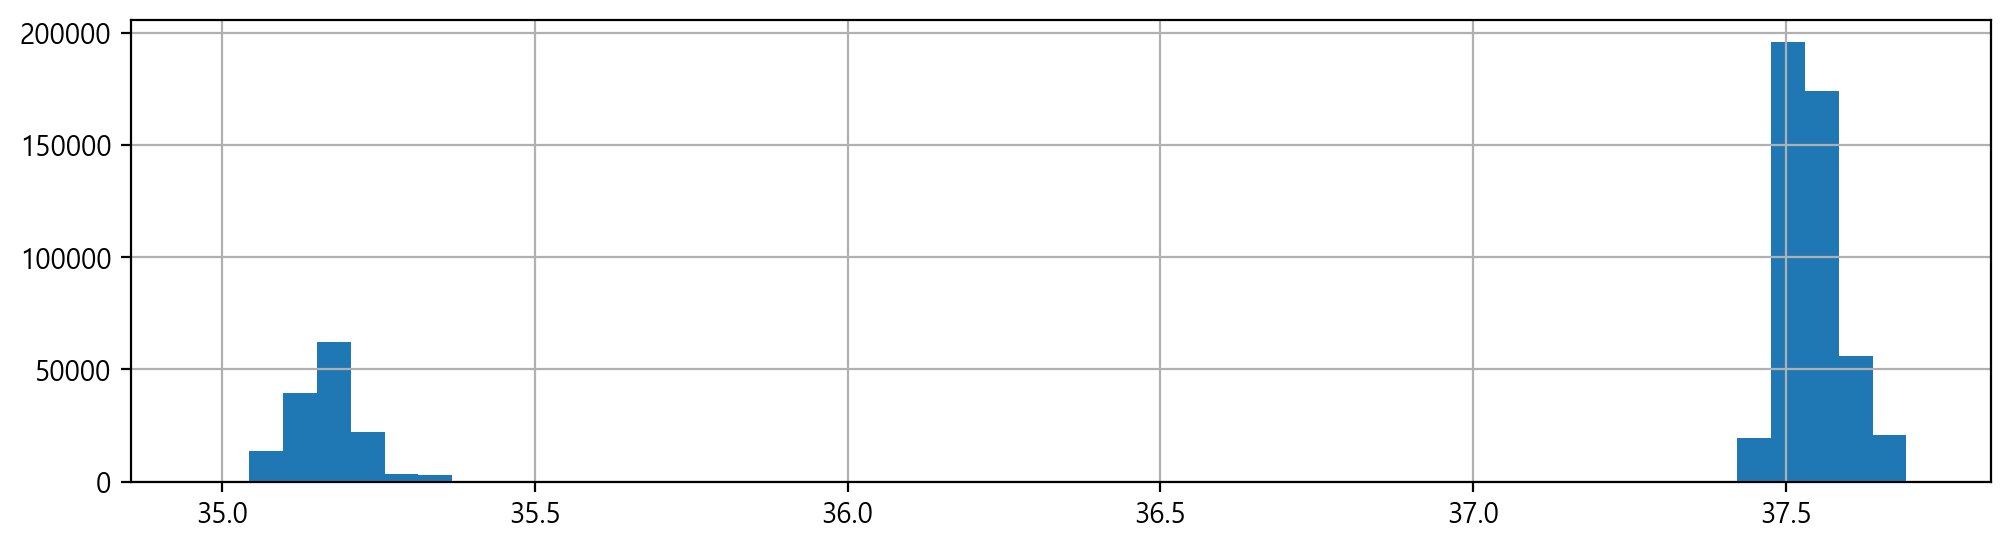

In [134]:
plt.figure(figsize=(12,3))
df['위도'].hist(bins=50)
plt.show()

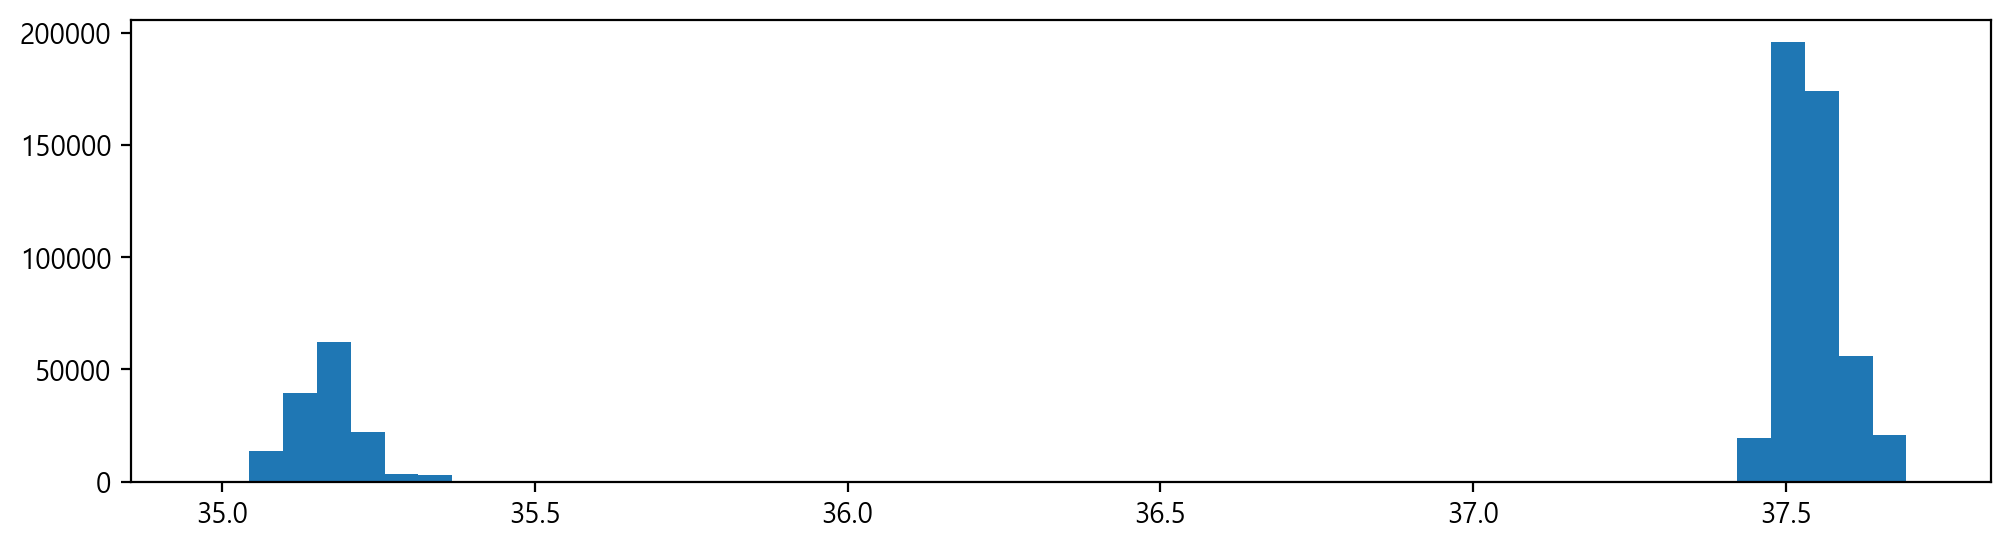

In [135]:
plt.figure(figsize=(12,3))
plt.hist(df['위도'],bins=50)
plt.show()

<Figure size 1200x300 with 0 Axes>

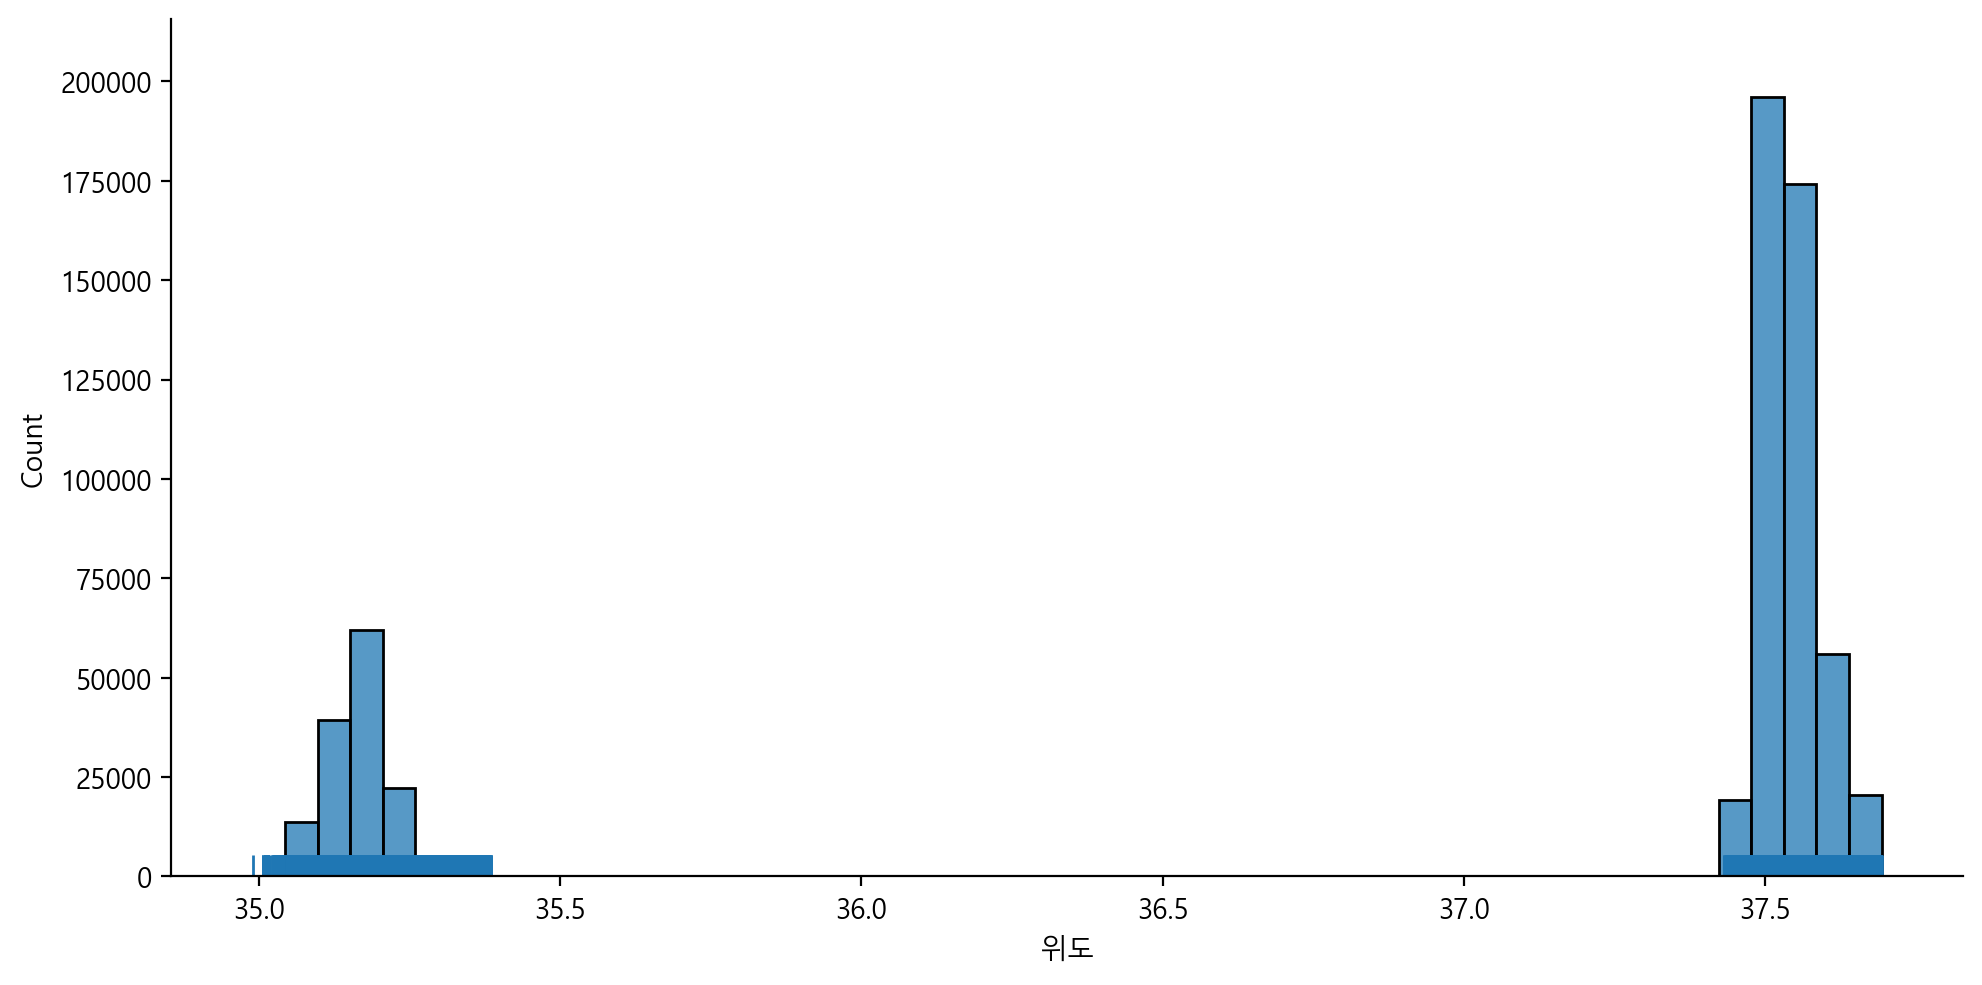

In [145]:
plt.figure(figsize=(12,3))
sns.displot(df['위도'], bins=50, rug=True, aspect=2.0) # figsize 적용 안 됨
plt.show()

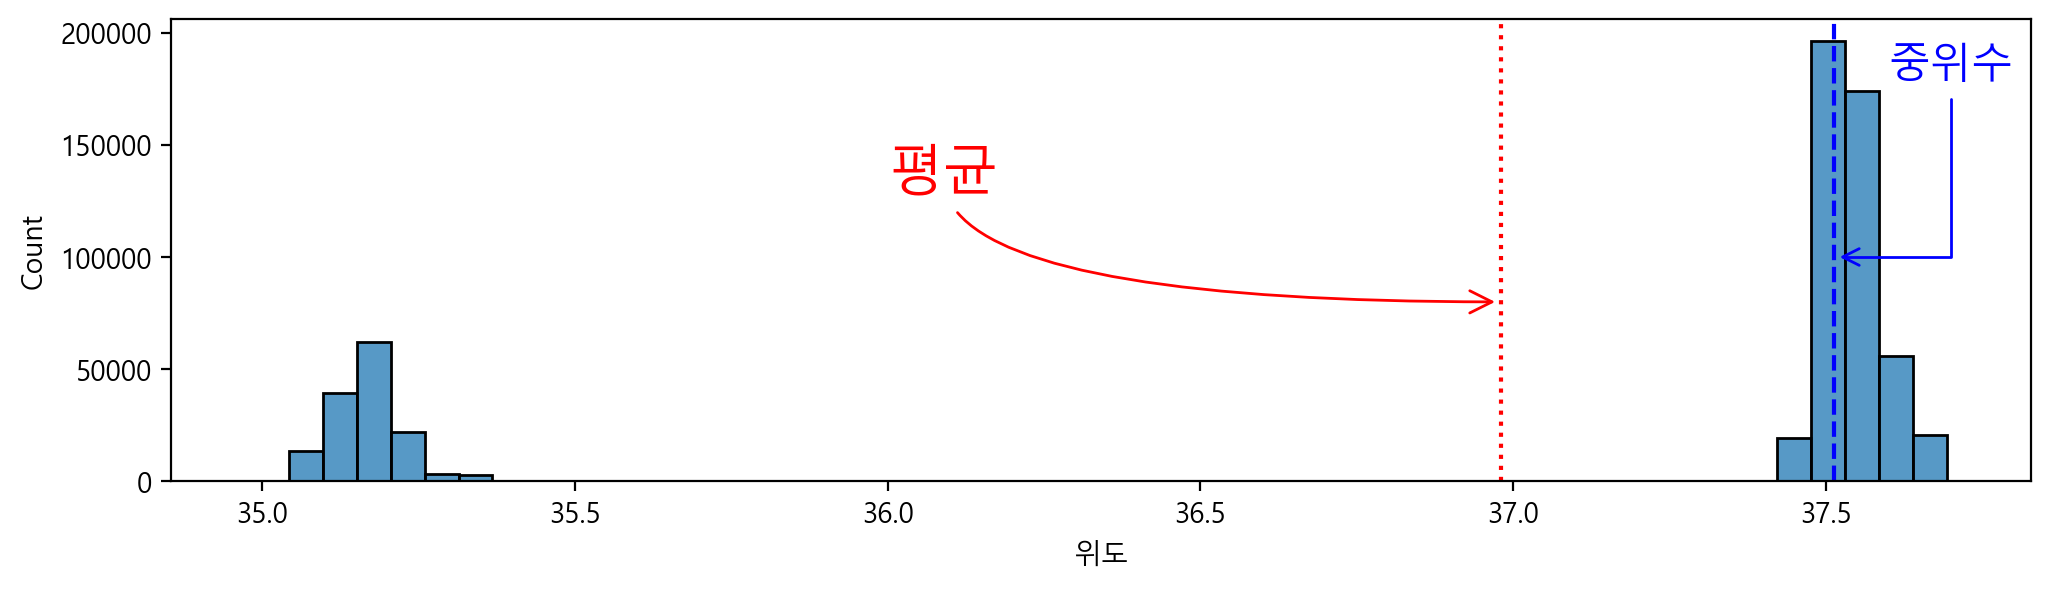

In [166]:
plt.figure(figsize=(12,3))

sns.histplot(df['위도'], bins=50)
plt.axvline(df['위도'].mean(), color='r', linestyle=':')
plt.annotate('평균',
            xytext=(36, 130000), # 글자 위치
            xy = (df['위도'].mean(), 80000), # 화살표가 가르킬 위치
            arrowprops={'arrowstyle':'->',
                       'connectionstyle':'angle3',
                       'color':'r'} ,
             fontsize=20,
             color='r',
            )
plt.axvline(df['위도'].median(), color='b', linestyle='--')
plt.annotate('중위수',
            xytext=(37.6, 180000), # 글씨 위치
            xy = (df['위도'].median(), 100000),   # 화살표가 가르킬 위치
            arrowprops=dict(arrowstyle = '->',
                           connectionstyle = 'angle',
                           color='b'),
            color='b',
            fontsize=15)
plt.show()

In [168]:
# 평균을 기준으로 데이터가 치우친 정도
# 음수 : 오른쪽으로 치우침 / 양수 : 왼쪽으로 치우침
df['위도'].skew() 

-1.2396532666468962

## ② 경도의 빈도표를 시각화 : plot.hist, hist, sns.displot, sns.histplot

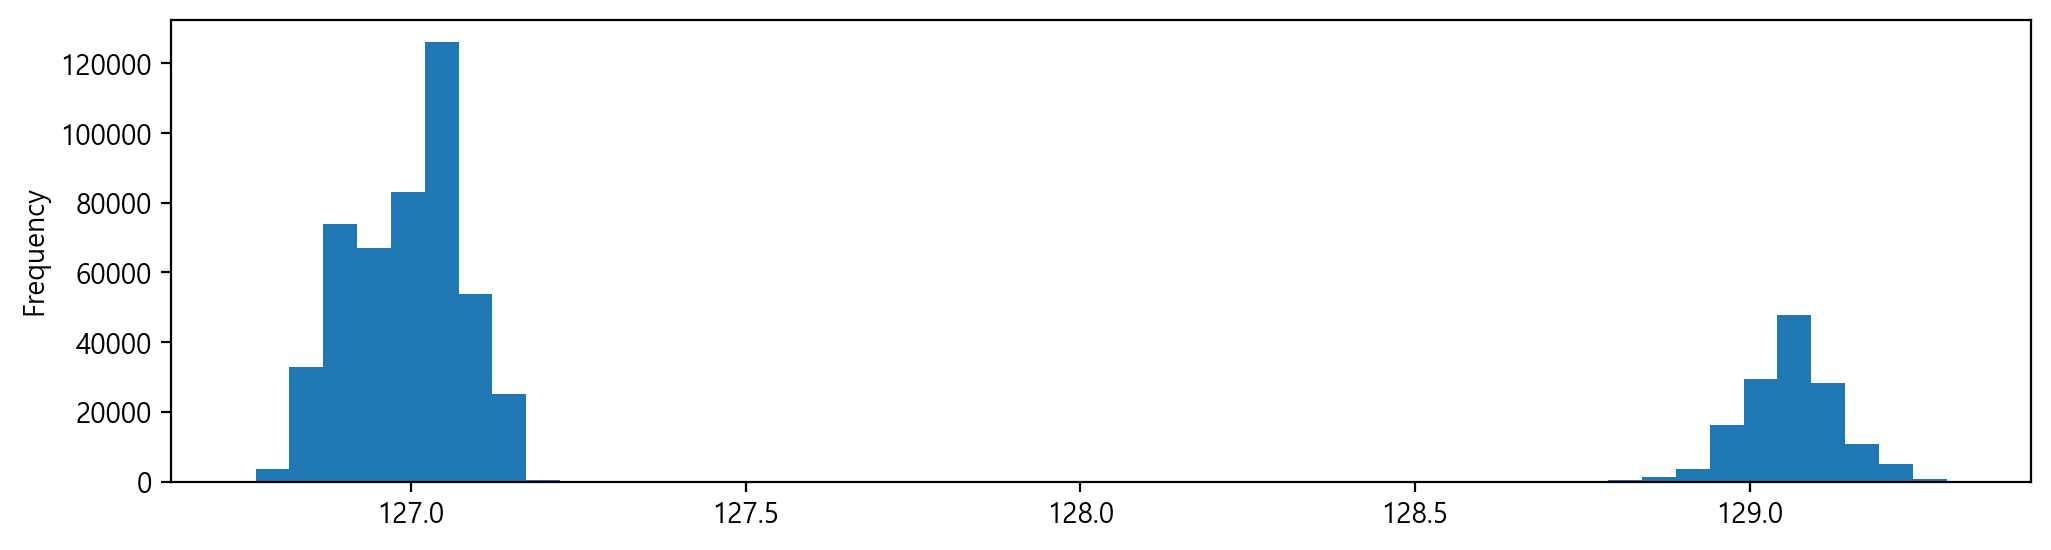

In [169]:
plt.figure(figsize=(12,3))
# df['경도'].plot.hist()
df['경도'].plot(kind='hist', bins=50)
plt.show()

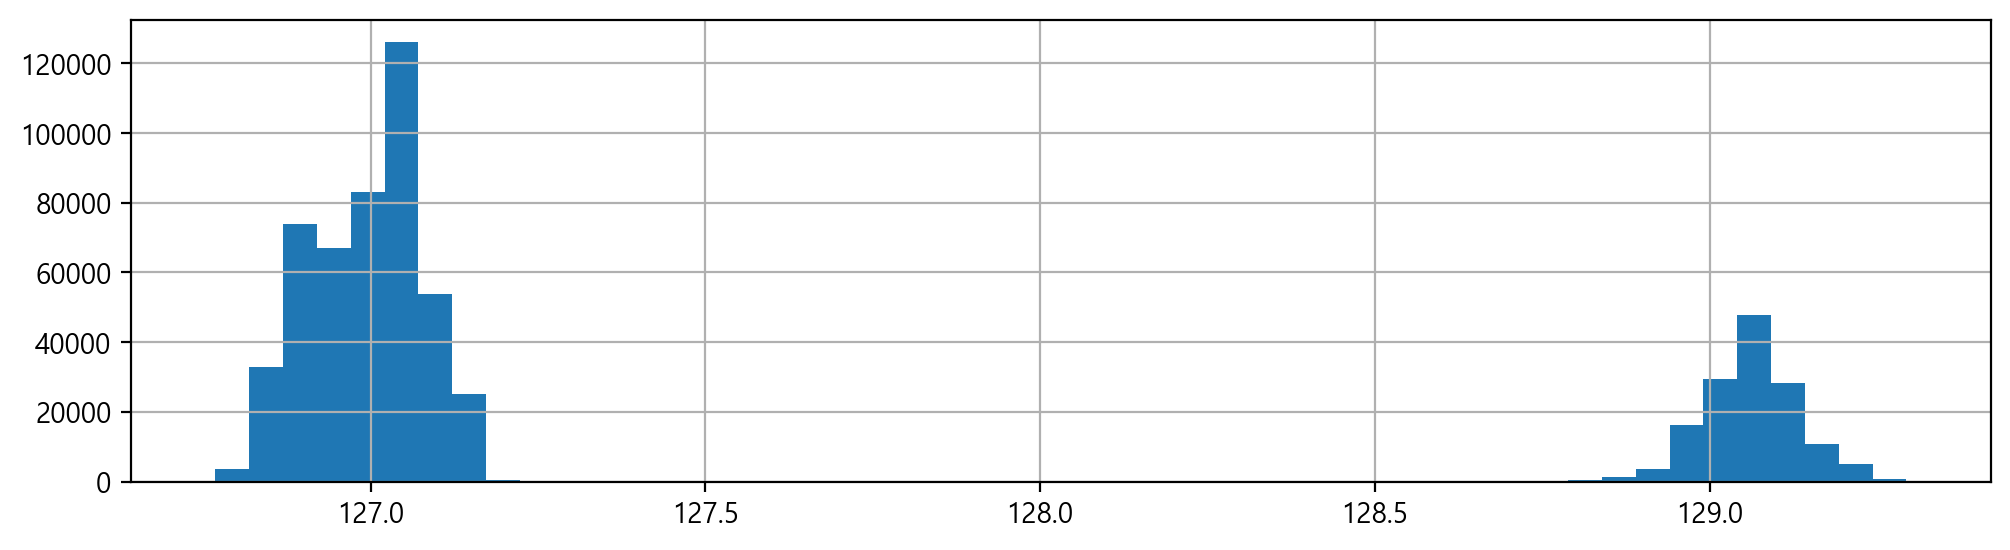

In [170]:
plt.figure(figsize=(12,3))
# df['경도'].plot.hist()
df['경도'].hist(bins=50)
plt.show()

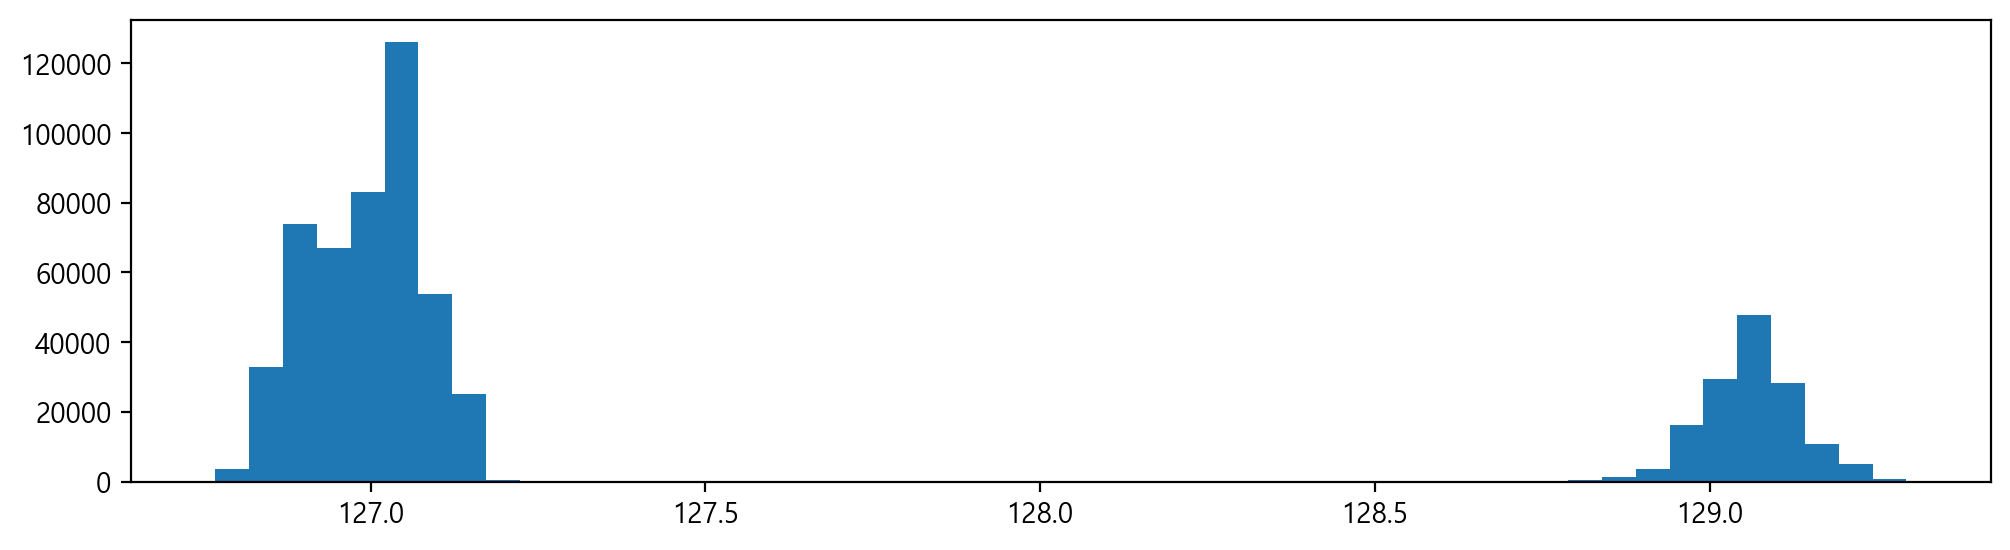

In [172]:
plt.figure(figsize=(12,3))
# df['경도'].plot.hist()
plt.hist(df['경도'], bins=50)
plt.show()

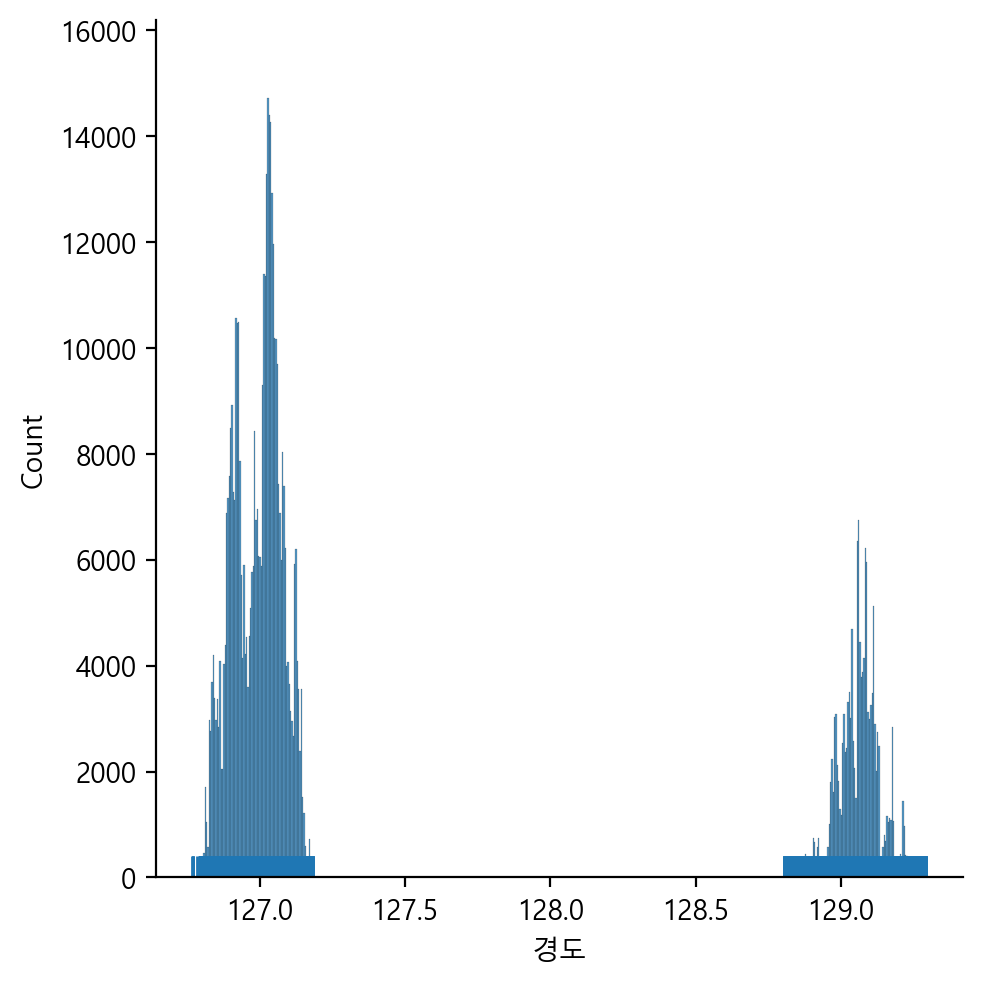

In [176]:
sns.displot(df['경도'],  rug=True)
plt.show()

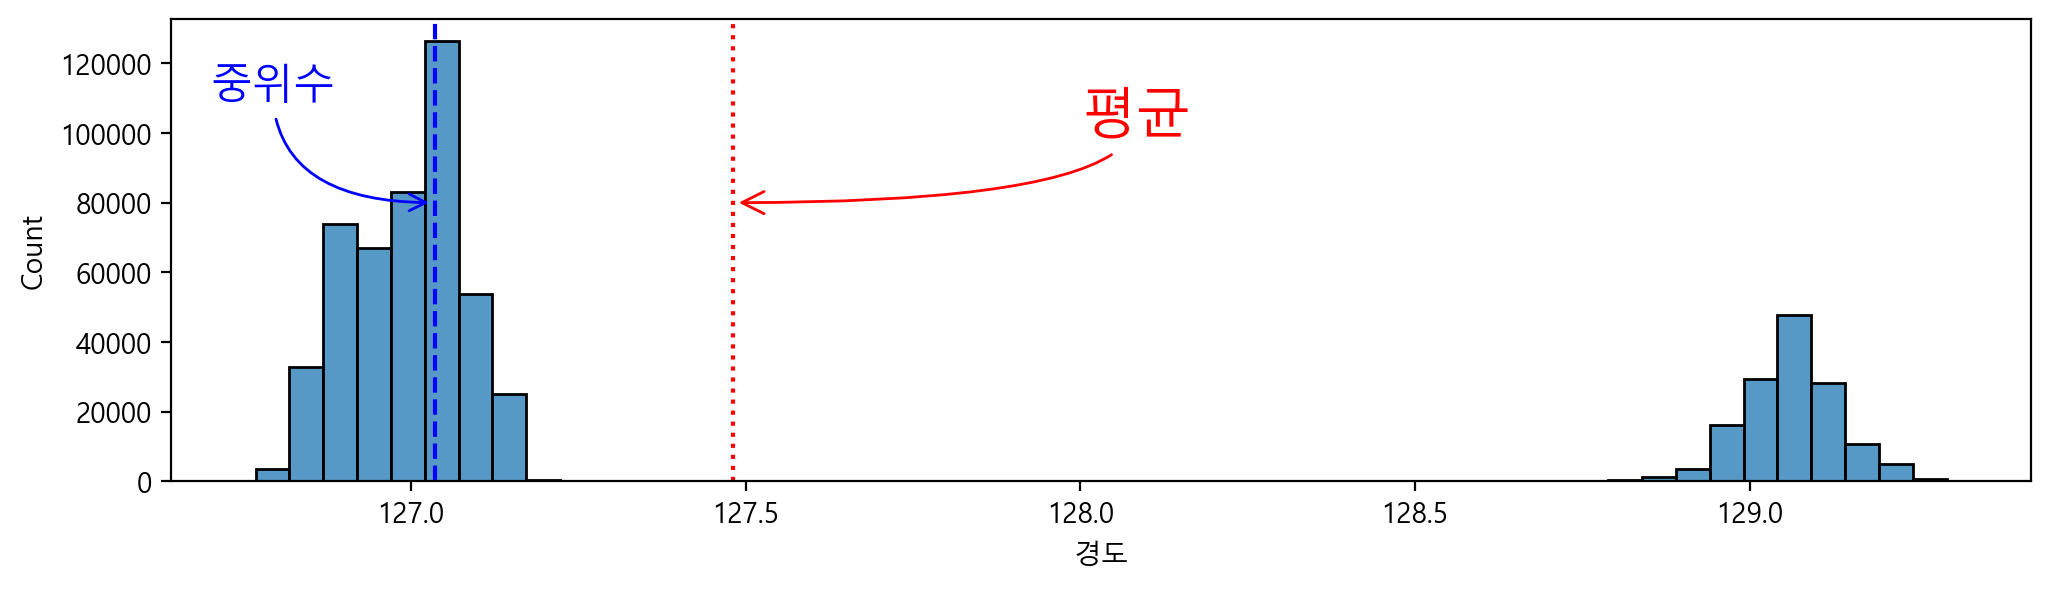

In [9]:
plt.figure(figsize=(12,3))

sns.histplot(df['경도'], bins=50)
plt.axvline(df['경도'].mean(), color='r', linestyle=':')
plt.annotate('평균',
            xytext = (128, 100000), # 글씨 위치
            xy = (df['경도'].mean(), 80000),     # 화살표 포인트 위치
            arrowprops={'arrowstyle':'->',
                       'connectionstyle':'angle3',
                       'color':'r'},
            color='r',
            fontsize=20)

plt.axvline(df['경도'].median(), color='b', linestyle='--')
plt.annotate('중위수',
            xytext = (126.7, 110000),
            xy = (df['경도'].median(), 80000),
            arrowprops = dict(arrowstyle = '->', 
                              connectionstyle = 'angle3', 
                              color='b'),
            color='b',
            fontsize=15)
plt.show()

# 8. 상관계수
-  두 변수 간에 어떤 선형적 관계를 갖고 있는 지를 분석하는 방법
 
- [상관 분석 - 위키백과, 우리 모두의 백과사전M](https://ko.wikipedia.org/wiki/상관_분석) 

- 결과의 해석 : r 값은 X 와 Y 가 완전히 동일하면 +1, 전혀 다르면 0, 반대방향으로 완전히 동일 하면 –1 을 가진다. 결정계수(coefficient of determination)는 $r^2$로 계산하며 이것은 X 로부터 Y를 예측할 수 있는 정도를 의미한다.
- ([수학기호 사이트 참조](https://matplotlib.org/2.0.2/users/mathtext.html))

- 일반적으로
    * r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
    * r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
    * r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
    * r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
    * r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
    * r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
    * r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계로 해석한다.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/220px-Correlation_examples2.svg.png" width="600">

이미지 출처 : [위키백과](https://ko.wikipedia.org/wiki/상관_분석)

## ①	전체 숫자 컬럼끼리의 상관계수